**K AJAY KUMAR REDDY**

**224161017**

**Data Visualization Project**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    from plotnine import *
    import plotly.express as px
except ImportError:
    print("Some libraries are not installed. Installing now...")
    !pip install plotnine
    !pip install plotly
    print("Libraries installed. Please rerun the code!")
    from plotnine import *
    import plotly.express as px

In [ ]:
df_crop=pd.read_csv("crop_production.csv")

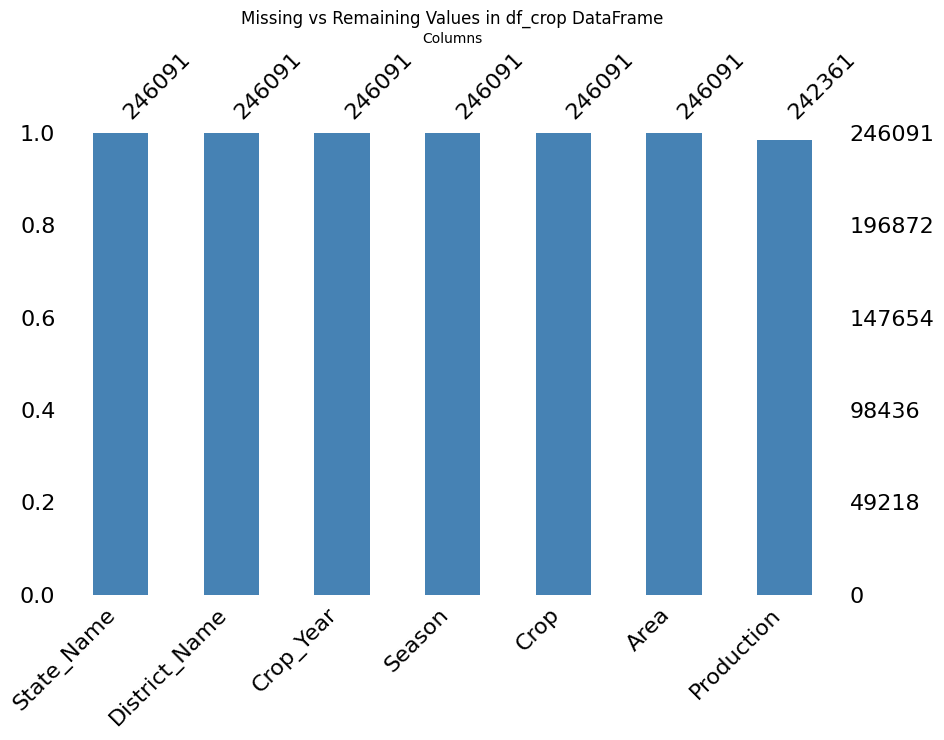

In [ ]:
import missingno as msno
# Plot missing vs remaining values in df_crop DataFrame
msno.bar(df_crop, figsize=(10, 6), color='steelblue')
plt.title('Missing vs Remaining Values in df_crop DataFrame')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()


The above plot show the missing values in the crop production data and Production column seems to have 3730 rows which are having NA values.

In [ ]:
df_crop.dropna(subset=['Production'], inplace=True)
for st in df_crop.columns:
  print("Missing values for",st,"  ",df_crop[st].isna().sum())

Missing values for State_Name    0
Missing values for District_Name    0
Missing values for Crop_Year    0
Missing values for Season    0
Missing values for Crop    0
Missing values for Area    0
Missing values for Production    0


The above code drops the columns which are having NA values in production.

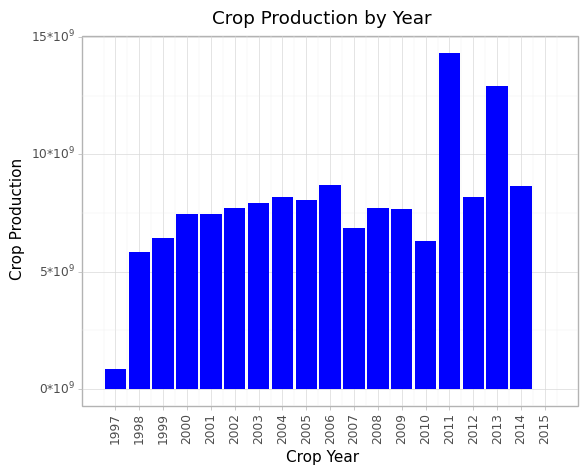

In [ ]:
# Group data by Crop_Year and sum the production
yearly_production = df_crop.groupby('Crop_Year', as_index=False).agg({'Production': 'sum'})
#print(yearly_production)
# Create bar plot
plot = (ggplot(yearly_production, aes(x='Crop_Year', y='Production')) +
        geom_col(fill='blue') +
        labs(title='Crop Production by Year',
             x='Crop Year',
             y='Crop Production') +
        theme_light()+scale_x_continuous(breaks=yearly_production['Crop_Year'], labels=yearly_production['Crop_Year'].astype(str))+
          scale_y_continuous(labels=lambda l: ["{}*$10^9$".format(int(x / 1e9)) for x in l]) +
        theme(axis_text_x=element_text(rotation=90, hjust=0.5)))

# Display the plot
print(plot)

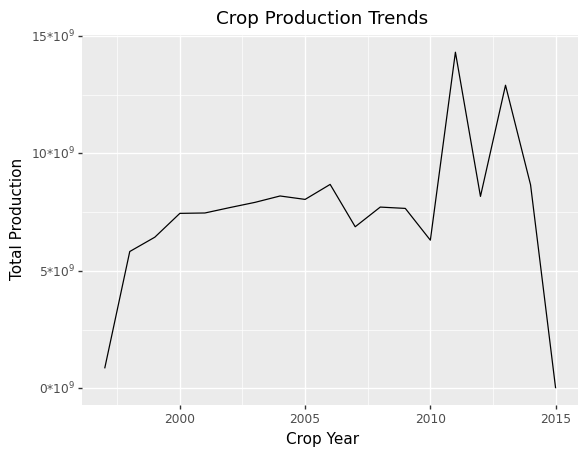

<ggplot: (8768897294403)>

In [ ]:
# Group by Crop_Year and calculate total production
crop_year_production = df_crop.groupby('Crop_Year')['Production'].sum().reset_index()

# Create a line chart using ggplot
ggplot(crop_year_production, aes(x='Crop_Year', y='Production')) + \
    geom_line() + \
    ggtitle('Crop Production Trends') + \
    xlab('Crop Year') + scale_y_continuous(labels=lambda l: ["{}*$10^9$".format(int(x / 1e9)) for x in l])+\
    ylab('Total Production')

In [ ]:
temp = df_crop.groupby(by='Crop_Year')['Area'].mean().reset_index()

fig = px.scatter(temp, 'Crop_Year', 'Area', color='Area', size='Area',
                 title='Average Crop Area by Year')
fig.update_layout(title={
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'})

fig.show()

The above two plots shows the crop production data and trend in second graph. From the data it's clear that the crop production in 2011 is high compared to crop production in all other years

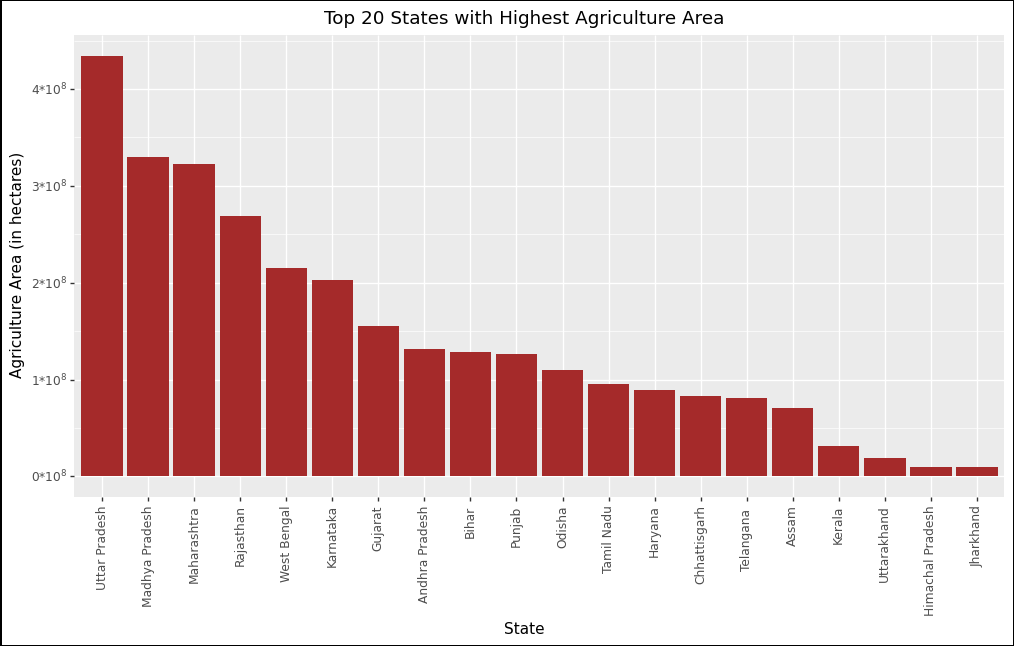

In [ ]:

# Filter the data to include only relevant columns
df_agriculture = df_crop[['State_Name', 'Area']]

# Groupby 'State_Name' and sum 'Area' to get the total area used for agriculture in each state
state_agriculture_area = df_agriculture.groupby('State_Name')['Area'].sum().reset_index()

# Sort the states by total area in descending order
top_10_states_agriculture = state_agriculture_area.sort_values('Area', ascending=False).head(20)

# Create a bar chart using ggplot and manually specify the order of x-axis labels
p = ggplot(top_10_states_agriculture, aes(x='reorder(State_Name, -Area)', y='Area')) + \
    geom_bar(stat='identity', fill='Brown') + \
    labs(title='Top 20 States with Highest Agriculture Area', x='State', y='Agriculture Area (in hectares)') + \
    scale_y_continuous(labels=lambda l: ["{}*$10^8$".format(int(x / 1e8)) for x in l])+\
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(12, 6),plot_background=element_rect(color='black'))

# Display the bar chart
print(p)


This plot shows the top 20 States with highest area that is used for cultivation of crop production and Uttar Pradesh being the largest state also uses more land than other states for crop Production.

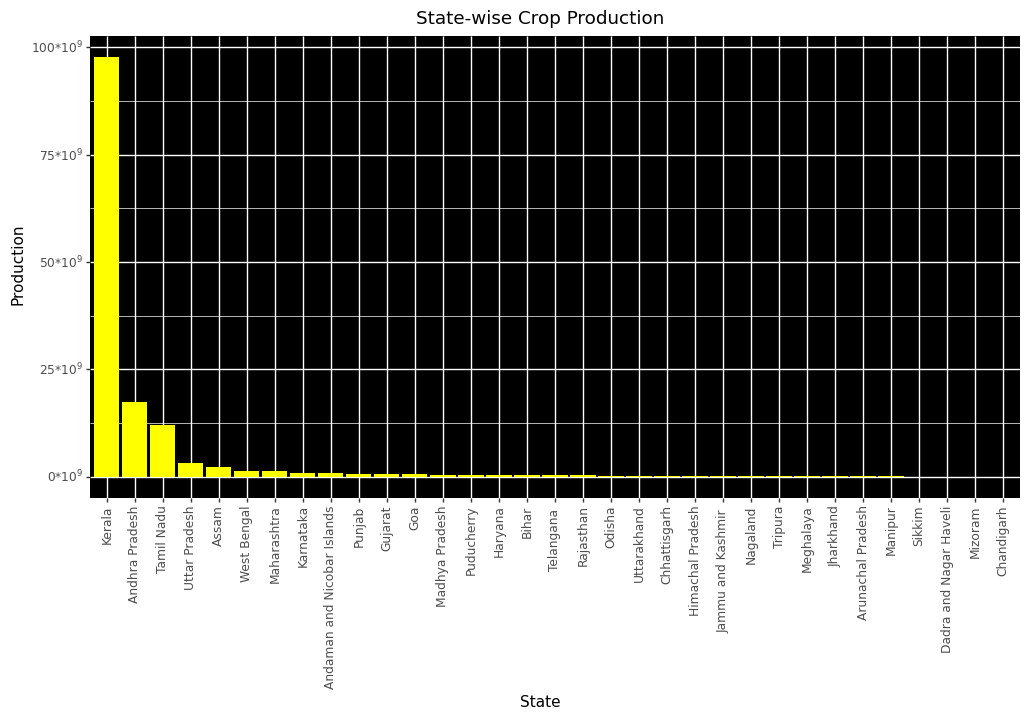

<ggplot: (8768897507121)>

In [ ]:
# Sort the states by production
state_production = (df_crop.groupby('State_Name')['Production'].sum().reset_index())
state_production = state_production.sort_values(by='Production', ascending=False).reset_index(drop=True)
#print(state_production)
# Plot the state-wise production as a bar graph using ggplot
ggplot(state_production, aes(x='reorder(State_Name,-Production)', y='Production')) + \
    geom_bar(stat='identity', fill='Yellow') + \
    labs(title='State-wise Crop Production', x='State', y='Production') + \
    scale_y_continuous(labels=lambda l: ["{}*$10^9$".format(int(x / 1e9)) for x in l])+\
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(12, 6),panel_background=element_rect(fill='black'))

Kerala comes first in terms of Production and the reason being production of coconut which weighs higher than other crops that lead to showing high production and followed by Andhra Pradesh which is by par most fertile state in India and has wide variety of crops and as we move on, the crops in the later part doesn't significantly contribute much to the production.

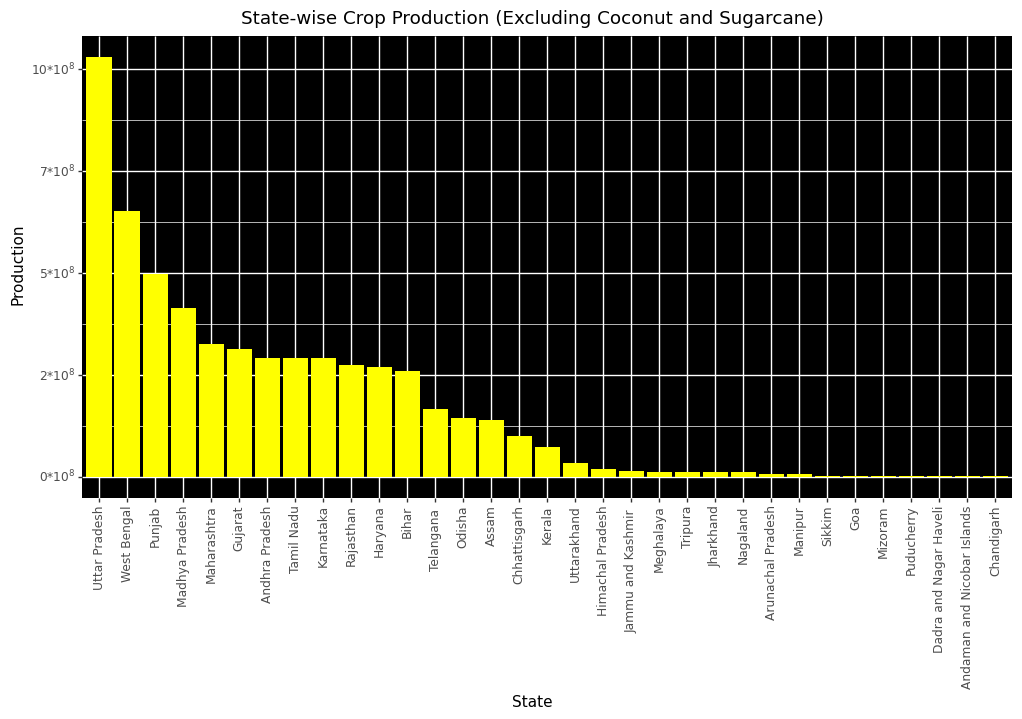

<ggplot: (8768896358190)>

In [ ]:
excluded_crops = ['Coconut ','Sugarcane']
df_crop_filtered =df_crop[~df_crop['Crop'].isin(excluded_crops)]
state_production = df_crop_filtered.groupby('State_Name')['Production'].sum().reset_index()

# Plot the state-wise production as a bar graph using ggplot
ggplot(state_production, aes(x='reorder(State_Name,-Production)', y='Production')) + \
    geom_bar(stat='identity', fill='yellow') + \
    labs(title='State-wise Crop Production (Excluding Coconut and Sugarcane)', x='State', y='Production') + \
    scale_y_continuous(labels=lambda l: ["{}*$10^8$".format(int(x / 1e8)) for x in l])+\
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(12, 6),panel_background=element_rect(fill='black'))

Avoiding the Production from coconut and sugar cane, this helps us to visualize the other states and their cintribution better than previous graph. Uttar Pradesh  followed by West Bengal comes to the party once we avoid top 2 crops.

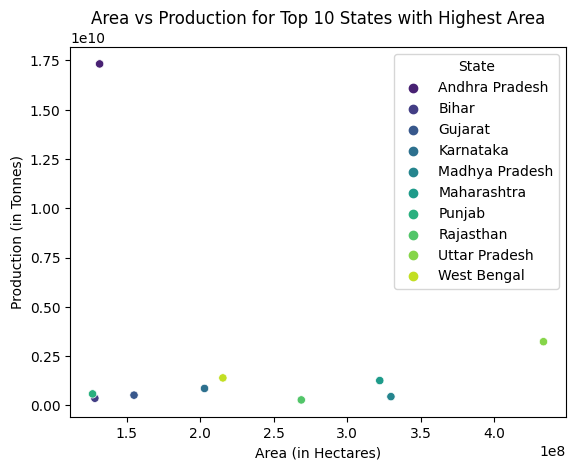

In [ ]:

# Groupby 'State_Name' and calculate the sum of 'Area' and 'Production' for each state
state_data = df_crop.groupby('State_Name').agg({'Area': 'sum', 'Production': 'sum'}).reset_index()

# Sort the states by area in descending order and select the top 10 states
top_10_states = state_data.sort_values('Area', ascending=False).head(10)

# Filter the data to include only the top 10 states
df_top_10_states = state_data[state_data['State_Name'].isin(top_10_states['State_Name'])]

# Create a scatter plot of 'Area' vs 'Production' using seaborn
sns.scatterplot(data=df_top_10_states, x='Area', y='Production', hue='State_Name', palette='viridis')
plt.xlabel('Area (in Hectares)')
plt.ylabel('Production (in Tonnes)')
plt.title('Area vs Production for Top 10 States with Highest Area')
plt.legend(title='State')
plt.show()

In [ ]:
df_crop['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [ ]:
temp = df_crop[(df_crop['Crop_Year']=='1997')]
k=df_crop['Crop_Year']=='1997'
print(k)
temp = temp.groupby(by='State_Name')['Area'].sum().reset_index()
temp = temp.nlargest(5, 'Area')

fig = px.pie(temp, values='Area', names='State_Name', title='Top 5 States with Highest Crop Area in 1997')
fig.show()


0         False
1         False
2         False
3         False
4         False
          ...  
246086    False
246087    False
246088    False
246089    False
246090    False
Name: Crop_Year, Length: 242361, dtype: bool


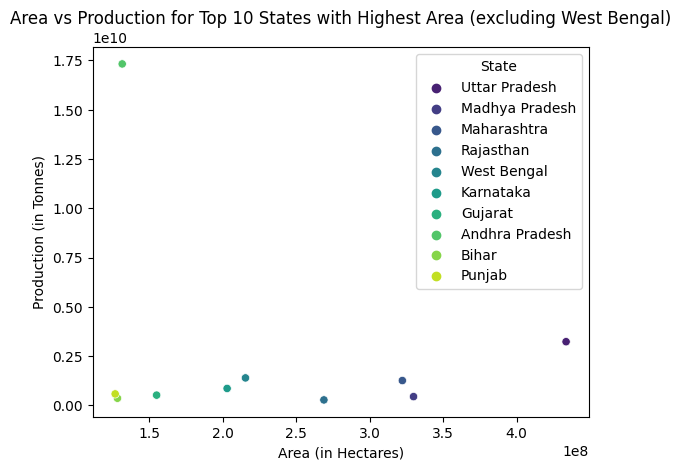

In [ ]:
# Groupby 'State_Name' and calculate the sum of 'Area' for each state
state_area =df_crop.groupby('State_Name').agg({'Area': 'sum', 'Production': 'sum'}).reset_index()
# Sort the states by area in descending order and select the top 10 states
top_10_states_area = state_area.sort_values('Area', ascending=False).head(10)
#print(top_10_states_area)
# Filter the data to include only the top 10 states
df_top_10_states_area = top_10_states_area[top_10_states_area['State_Name'].isin(top_10_states_area['State_Name'])]

# Create a scatter plot of 'Area' vs 'Production' using seaborn
sns.scatterplot(data=df_top_10_states_area, x='Area', y='Production', hue='State_Name', palette='viridis')
plt.xlabel('Area (in Hectares)')
plt.ylabel('Production (in Tonnes)')
plt.title('Area vs Production for Top 10 States with Highest Area (excluding West Bengal)')
plt.legend(title='State')
plt.show()

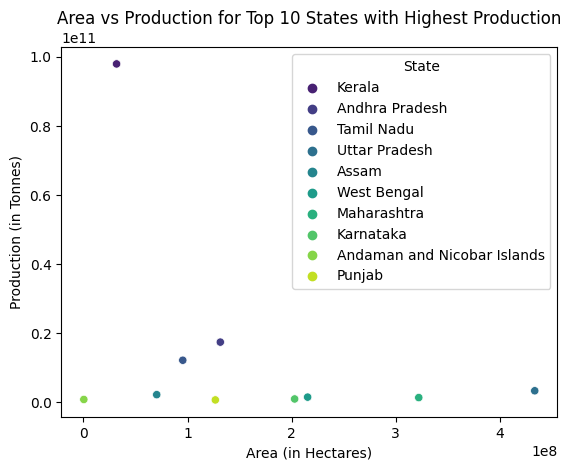

In [ ]:
# Groupby 'State_Name' and calculate the sum of 'Production' for each state
state_production =df_crop.groupby('State_Name').agg({'Area': 'sum', 'Production': 'sum'}).reset_index()

# Sort the states by production in descending order and select the top 10 states
top_10_states_production = state_production.sort_values('Production', ascending=False).head(10)

# Filter the data to include only the top 10 states
df_top_10_states_production = top_10_states_production[top_10_states_production['State_Name'].isin(top_10_states_production['State_Name'])]

# Create a scatter plot of 'Area' vs 'Production' using seaborn
sns.scatterplot(data=df_top_10_states_production, x='Area', y='Production', hue='State_Name', palette='viridis')
plt.xlabel('Area (in Hectares)')
plt.ylabel('Production (in Tonnes)')
plt.title('Area vs Production for Top 10 States with Highest Production')
plt.legend(title='State')
plt.show()

The above two explore the Area vs Production, showing whether the state with most area has most production and vice versa. West Bengal is the state that has used most Area for agriculture but Andhra Pradesh seems to be game changer as it has more production with less Area.

Kerala as expected will be on top when we consider Production data and Andhra pradesh is on the second of the list which has more yield even with less Area usage because of its river basins of Godawari and Krishna.

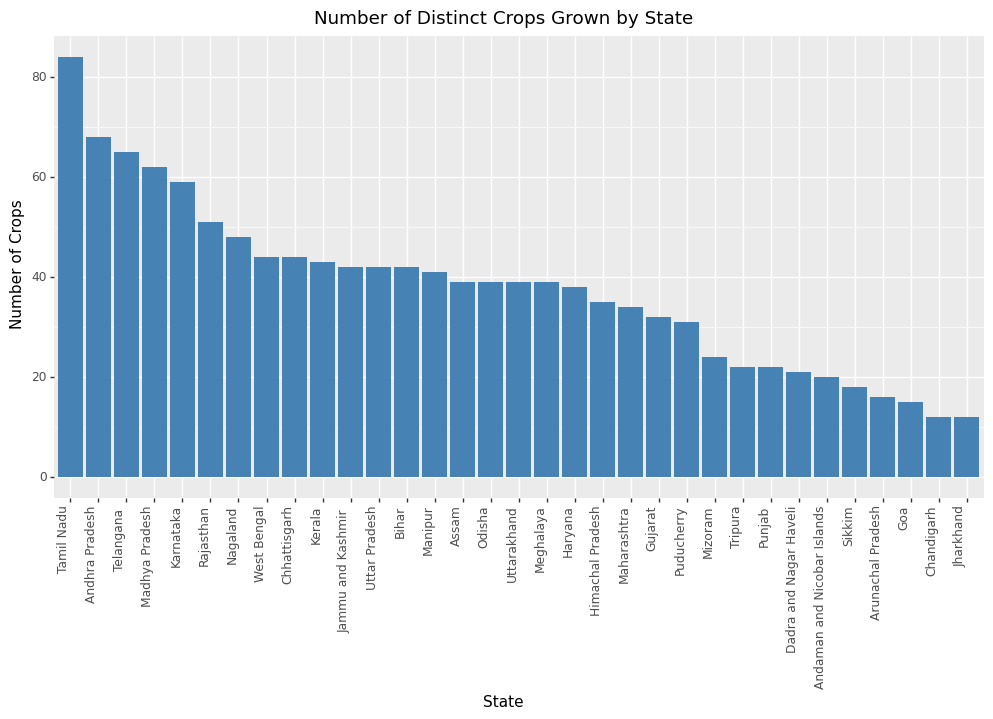

<ggplot: (8768896394736)>

In [ ]:
# Group by State_Name and count the unique crops in each state
crop_counts = df_crop.groupby('State_Name')['Crop'].nunique().reset_index()
crop_counts.columns = ['State_Name', 'Num_Crops']

# Create a bar chart using ggplot with increased figure size
(ggplot(crop_counts, aes(x='reorder(State_Name,-Num_Crops)', y='Num_Crops'))
 + geom_bar(stat='identity', fill='steelblue')
 + labs(title='Number of Distinct Crops Grown by State', x='State', y='Number of Crops')
 + theme(axis_text_x=element_text(angle=90, ha='right'))
 + theme(figure_size=(12, 6))) # Set the desired width and height of the plot


The above graphs shows distinct crops grown by each state and Tamil Nadu seems to have more varieties of crops.

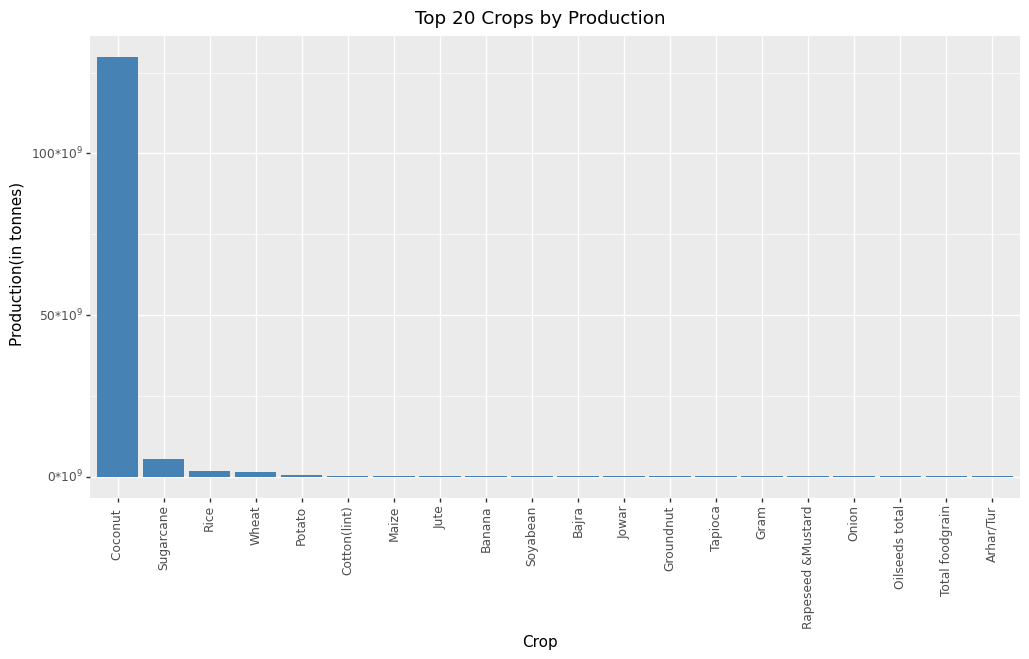

<ggplot: (8768896358352)>

In [ ]:
crop_10 = df_crop.groupby('Crop')['Production'].sum().reset_index()

# Sort 'crop_10' DataFrame by 'Production' column in descending order
crop_10_sorted = crop_10.sort_values(by='Production', ascending=False)

# Select top 20 crops
top_20_crops = crop_10_sorted.head(20)
# Plot the top 20 crops as a bar graph using ggplot
ggplot(top_20_crops, aes(x='reorder(Crop,-Production)', y='Production')) + \
    geom_bar(stat='identity', fill='steelblue') +scale_y_continuous(labels=lambda l: ["{}*$10^9$".format(int(x / 1e9)) for x in l])+ \
    labs(title='Top 20 Crops by Production', x='Crop', y='Production(in tonnes)') + \
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(12, 6))

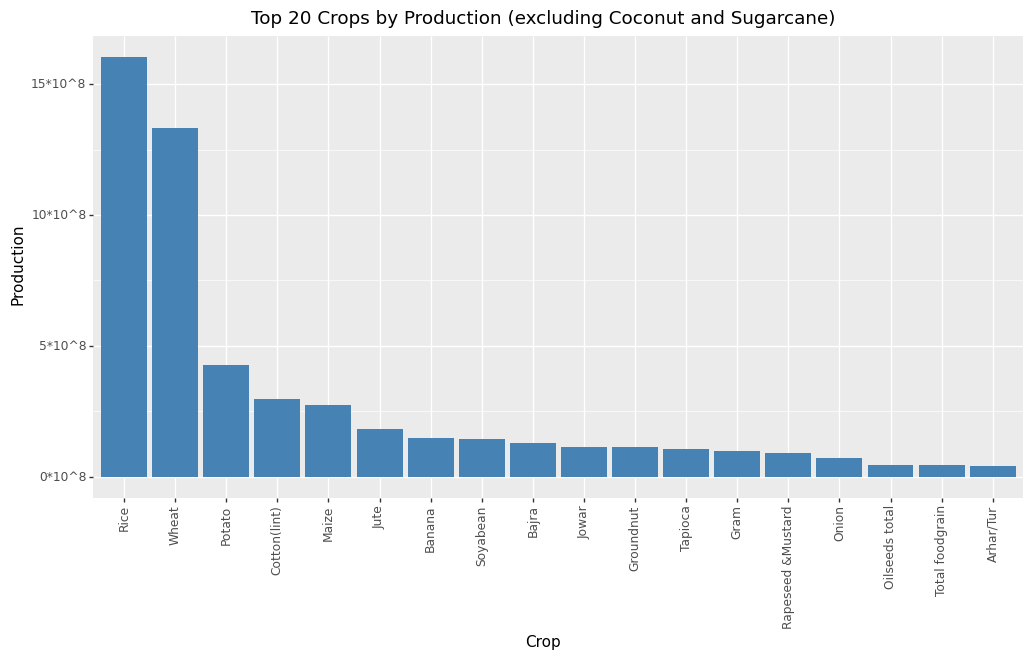

<ggplot: (8768898290767)>

In [ ]:
crop_10 = df_crop.groupby('Crop')['Production'].sum().reset_index()

# Sort 'crop_10' DataFrame by 'Production' column in descending order
crop_10_sorted = crop_10.sort_values(by='Production', ascending=False)

# Select top 20 crops
top_20_crops = crop_10_sorted.head(20)
# Remove the first column (index) from 'top_20_crops' DataFrame
top_20_crops = top_20_crops.iloc[2:, :]
# Plot the top 20 crops as a bar graph using ggplot
ggplot(top_20_crops, aes(x='reorder(Crop,-Production)', y='Production')) + \
    geom_bar(stat='identity', fill='steelblue') +\
    scale_y_continuous(labels=lambda l: ["{}*10^8".format(int(x / 1e8)) for x in l])+ \
    labs(title='Top 20 Crops by Production (excluding Coconut and Sugarcane)', x='Crop', y='Production') + \
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(12, 6))

The above graph show rice as highest produce which follows coconut and sugarcane. Wheat is also having good produce next to rice.

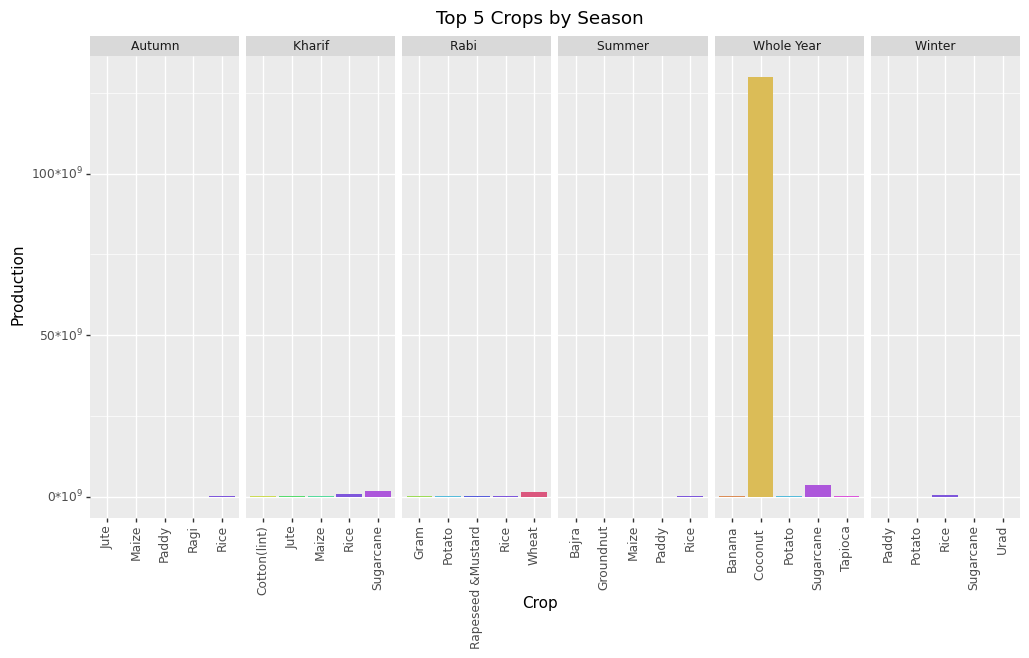

<ggplot: (8768897594612)>

In [ ]:

season_crop_production = df_crop.groupby(['Season', 'Crop'])['Production'].sum().reset_index()

# Sort the season_crop_production DataFrame by 'Season' and 'Production' in descending order
season_crop_production = season_crop_production.sort_values(['Season', 'Production'], ascending=[True, False])

# Create a new column 'Rank' to rank the crops within each season
season_crop_production['Rank'] = season_crop_production.groupby('Season')['Production'].rank(method='first', ascending=False)

# Filter the top 3 crops for each season
top3_crops_by_season = season_crop_production[season_crop_production['Rank'] <= 5]

# Plot the top 3 crops by season as a bar graph with facetting by season using ggplot
(ggplot(top3_crops_by_season, aes(x='Crop', y='Production', fill='Crop')) +
 geom_bar(stat='identity') +
 labs(title='Top 5 Crops by Season', x='Crop', y='Production') +scale_y_continuous(labels=lambda l: ["{}*$10^9$".format(int(x / 1e9)) for x in l])+
 facet_wrap('~Season', scales='free_x', nrow=1) +
 theme(axis_text_x=element_text(rotation=90, hjust=0.5),legend_position='none', figure_size=(12, 6)))

The above facetted graph shows the top 5 crops in each season and as expected coconut lies as outlier and this crop is grown throughout the year. As crops grown throughout the year will have more yield as they are grown in every season.

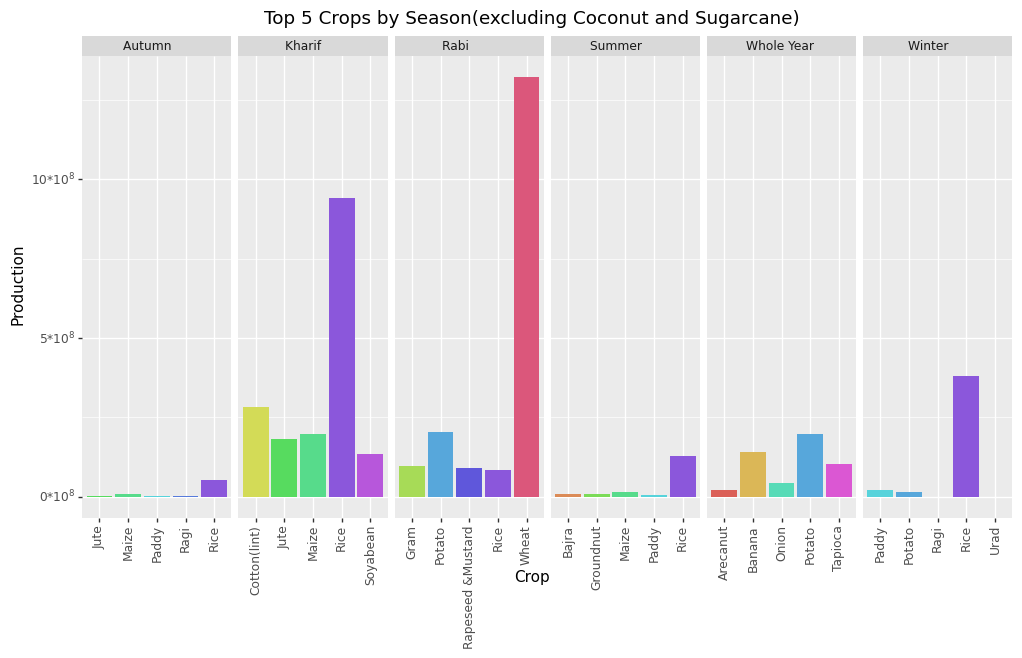

<ggplot: (8768896978443)>

In [ ]:
excluded_crops = ['Coconut ','Sugarcane']
df_crop_filtered =df_crop[~df_crop['Crop'].isin(excluded_crops)]
season_crop_production = df_crop_filtered.groupby(['Season', 'Crop'])['Production'].sum().reset_index()

# Sort the season_crop_production DataFrame by 'Season' and 'Production' in descending order
season_crop_production = season_crop_production.sort_values(['Season', 'Production'], ascending=[True, False])

# Create a new column 'Rank' to rank the crops within each season
season_crop_production['Rank'] = season_crop_production.groupby('Season')['Production'].rank(method='first', ascending=False)

# Filter the top 3 crops for each season
top3_crops_by_season = season_crop_production[season_crop_production['Rank'] <= 5]

# Plot the top 3 crops by season as a bar graph with facetting by season using ggplot
(ggplot(top3_crops_by_season, aes(x='Crop', y='Production', fill='Crop')) +
 geom_bar(stat='identity') +
 labs(title='Top 5 Crops by Season(excluding Coconut and Sugarcane)', x='Crop', y='Production') +
 scale_y_continuous(labels=lambda l: ["{}*$10^8$".format(int(x / 1e8)) for x in l])+
 facet_wrap('~Season', scales='free_x', nrow=1) +
 theme(axis_text_x=element_text(rotation=90, hjust=0.5),legend_position='none', figure_size=(12, 6)))

Once we exclude coconut and Sugarcane, Rice almost has its availability top 5 of each season and Wheat shows its dominance in Rabi season as it needs cool moist climate and ripens in warm.

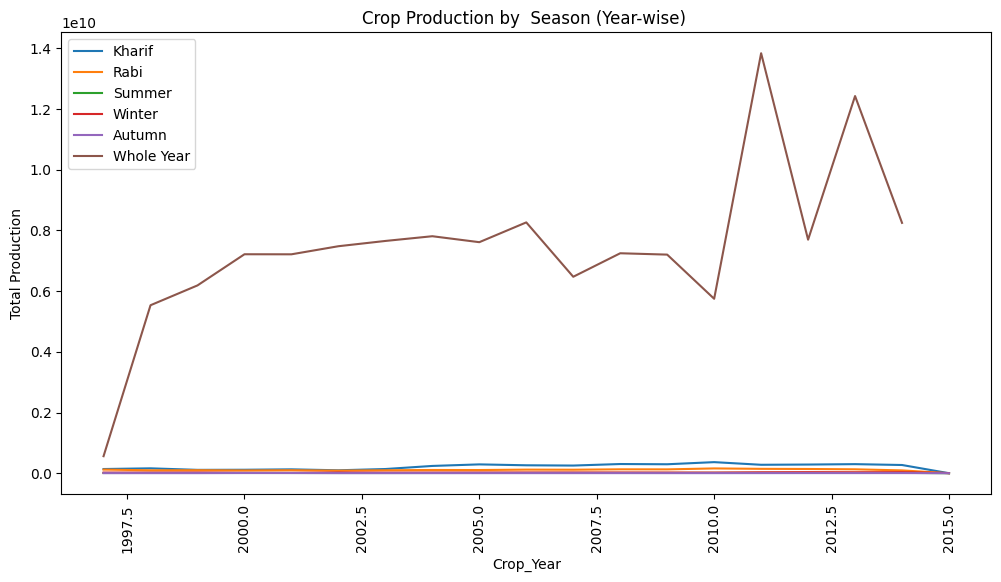

In [ ]:

# Filter crops based on seasons
kharif_crops = df_crop[df_crop['Season'] == 'Kharif     ']
rabi_crops = df_crop[df_crop['Season'] == 'Rabi       ']
summer_crops = df_crop[df_crop['Season'] == 'Summer     ']
winter_crops = df_crop[df_crop['Season'] == 'Winter     ']
autumn_crops = df_crop[df_crop['Season'] == 'Autumn     ']
whole_year_crops = df_crop[df_crop['Season'] == 'Whole Year ']

# Calculate total production by season
kharif_production = kharif_crops.groupby('Crop_Year')['Production'].sum()
rabi_production = rabi_crops.groupby('Crop_Year')['Production'].sum()
summer_production = summer_crops.groupby('Crop_Year')['Production'].sum()
winter_production = winter_crops.groupby('Crop_Year')['Production'].sum()
autumn_production = autumn_crops.groupby('Crop_Year')['Production'].sum()
whole_year_production = whole_year_crops.groupby('Crop_Year')['Production'].sum()

# Create line charts for production by season
plt.figure(figsize=(12, 6))
plt.plot(kharif_production.index, kharif_production.values, label='Kharif')
plt.plot(rabi_production.index, rabi_production.values, label='Rabi')
plt.plot(summer_production.index, summer_production.values, label='Summer')
plt.plot(winter_production.index, winter_production.values, label='Winter')
plt.plot(autumn_production.index, autumn_production.values, label='Autumn')
plt.plot(whole_year_production.index, whole_year_production.values, label='Whole Year')
plt.xlabel('Crop_Year')
plt.ylabel('Total Production')
plt.title('Crop Production by  Season (Year-wise) ')
plt.legend()
plt.xticks(rotation=90)
plt.show()


When we plot the production data with time we are unable to find the trend as crop production overtakes all other seasonal crops as its yield is very high compared to other seasonal crops.

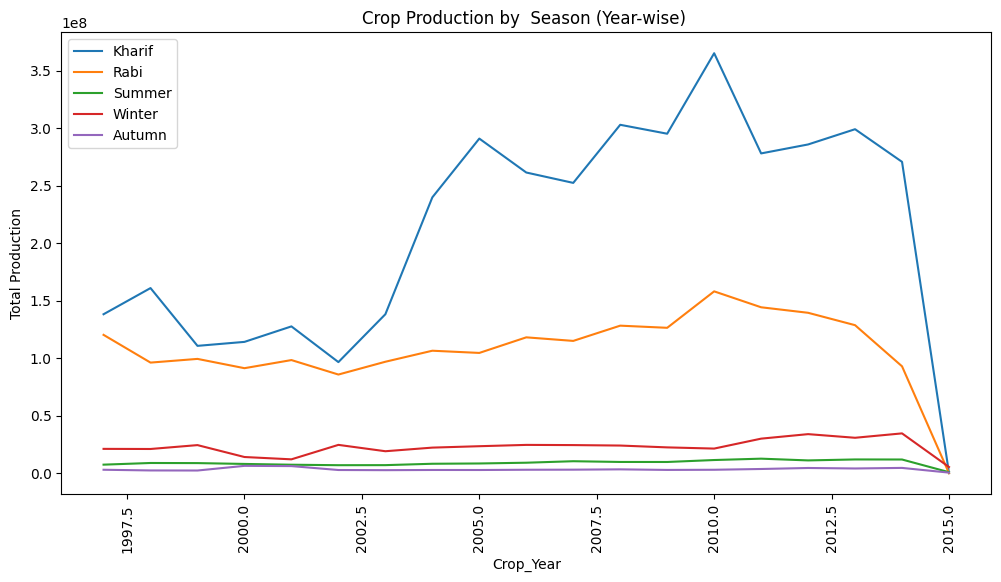

In [ ]:

# Filter crops based on seasons
kharif_crops = df_crop[df_crop['Season'] == 'Kharif     ']
rabi_crops = df_crop[df_crop['Season'] == 'Rabi       ']
summer_crops = df_crop[df_crop['Season'] == 'Summer     ']
winter_crops = df_crop[df_crop['Season'] == 'Winter     ']
autumn_crops = df_crop[df_crop['Season'] == 'Autumn     ']
#whole_year_crops = df_crop[df_crop['Season'] == 'Whole Year ']

# Calculate total production by season
kharif_production = kharif_crops.groupby('Crop_Year')['Production'].sum()
rabi_production = rabi_crops.groupby('Crop_Year')['Production'].sum()
summer_production = summer_crops.groupby('Crop_Year')['Production'].sum()
winter_production = winter_crops.groupby('Crop_Year')['Production'].sum()
autumn_production = autumn_crops.groupby('Crop_Year')['Production'].sum()
#whole_year_production = whole_year_crops.groupby('Crop_Year')['Production'].sum()

# Create line charts for production by season
plt.figure(figsize=(12, 6))
plt.plot(kharif_production.index, kharif_production.values, label='Kharif')
plt.plot(rabi_production.index, rabi_production.values, label='Rabi')
plt.plot(summer_production.index, summer_production.values, label='Summer')
plt.plot(winter_production.index, winter_production.values, label='Winter')
plt.plot(autumn_production.index, autumn_production.values, label='Autumn')
#plt.plot(whole_year_production.index, whole_year_production.values, label='Whole Year')
plt.xlabel('Crop_Year')
plt.ylabel('Total Production')
plt.title('Crop Production by  Season (Year-wise) ')
plt.legend()
plt.xticks(rotation=90)
plt.show()


Once we exclude the Whole year crops, Rabi and Khariff which are India's agricultural seaons trend can be observed. Kharif has more production compared to Rabi and they came almost close in the year 2005, Apart from that there is a good gap between these two seasons.

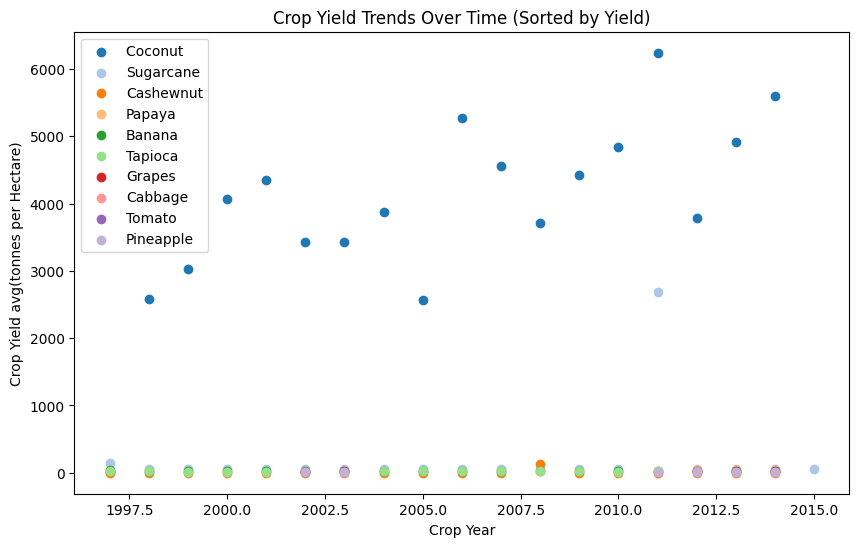

In [ ]:
# Calculate crop yield
df_crop['Yield'] = df_crop['Production'] / df_crop['Area']

# Group by Crop and Crop_Year, calculate average yield
crop_yearly_yield = df_crop.groupby(['Crop', 'Crop_Year'])['Yield'].mean().reset_index()

# Sort by Yield in descending order
crop_yearly_yield = crop_yearly_yield.sort_values(by='Yield', ascending=False)

# Create a scatter plot for crop yield trends over time
plt.figure(figsize=(10, 6))  # Set the figure size
colors = plt.cm.tab20.colors  # Define color palette
for i, crop in enumerate(crop_yearly_yield['Crop'].unique()[0:10]):
    crop_data = crop_yearly_yield[crop_yearly_yield['Crop'] == crop]
    plt.scatter(crop_data['Crop_Year'], crop_data['Yield'], color=colors[i % len(colors)], label=crop)
plt.xlabel('Crop Year')
plt.ylabel('Crop Yield avg(tonnes per Hectare)')
plt.title('Crop Yield Trends Over Time (Sorted by Yield)')
plt.legend()
plt.show()


A new variable **Yield** has been introduced to find the trends in the crop Production. The above scatterplot shows one data point beloning to sugarcane in the year 2011 which has more yield comapared to other years.

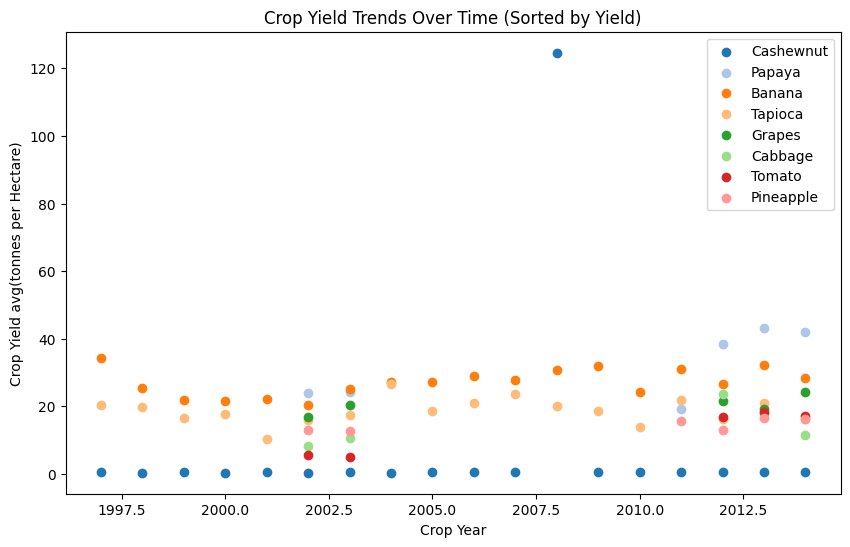

In [ ]:
# Calculate crop yield
df_crop['Yield'] = df_crop['Production'] / df_crop['Area']

# Group by Crop and Crop_Year, calculate average yield
crop_yearly_yield = df_crop.groupby(['Crop', 'Crop_Year'])['Yield'].mean().reset_index()

# Sort by Yield in descending order
crop_yearly_yield = crop_yearly_yield.sort_values(by='Yield', ascending=False)

# Create a scatter plot for crop yield trends over time
plt.figure(figsize=(10, 6))  # Set the figure size
colors = plt.cm.tab20.colors  # Define color palette
for i, crop in enumerate(crop_yearly_yield['Crop'].unique()[2:10]):
    crop_data = crop_yearly_yield[crop_yearly_yield['Crop'] == crop]
    plt.scatter(crop_data['Crop_Year'], crop_data['Yield'], color=colors[i % len(colors)], label=crop)
plt.xlabel('Crop Year')
plt.ylabel('Crop Yield avg(tonnes per Hectare)')
plt.title('Crop Yield Trends Over Time (Sorted by Yield)')
plt.legend()
plt.show()


Cashewnut is also having some data outlier in 2008 which is explored below.

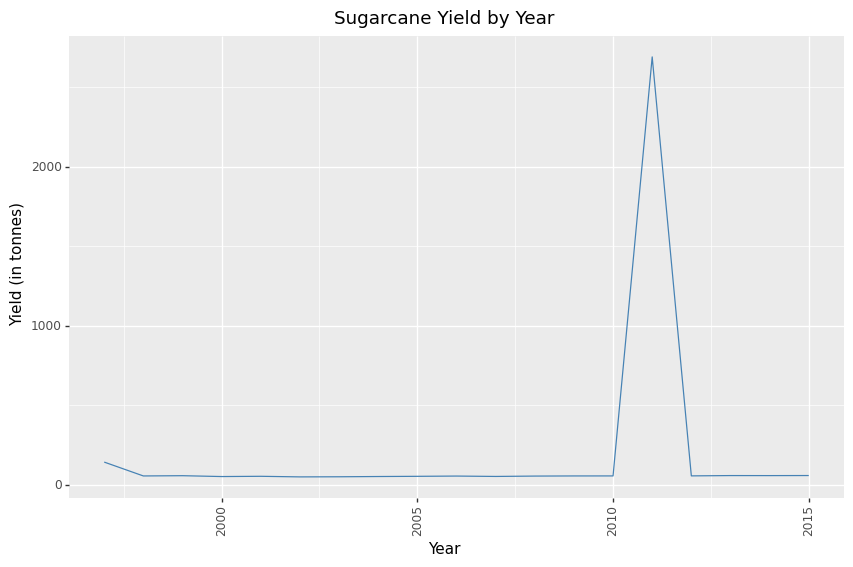

<ggplot: (8768901132622)>

In [ ]:
#Sugarcane
# Filter the data for Sugarcane  crop
df_Sugarcane = df_crop[df_crop['Crop'] == 'Sugarcane'].copy()
df_Sugarcane['Yield'] = df_Sugarcane['Production'] / df_Sugarcane['Area']
# Groupby 'Crop_Year' and calculate the mean of 'Yield' to get the average yield for each year
Sugarcane_yield = df_Sugarcane.groupby('Crop_Year')['Yield'].mean().reset_index()

# Create the line chart using ggplot
(ggplot(Sugarcane_yield, aes(x='Crop_Year', y='Yield')) +
    geom_line(color='steelblue') +
    labs(title='Sugarcane Yield by Year', x='Year', y='Yield (in tonnes)') +
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(10, 6))
)

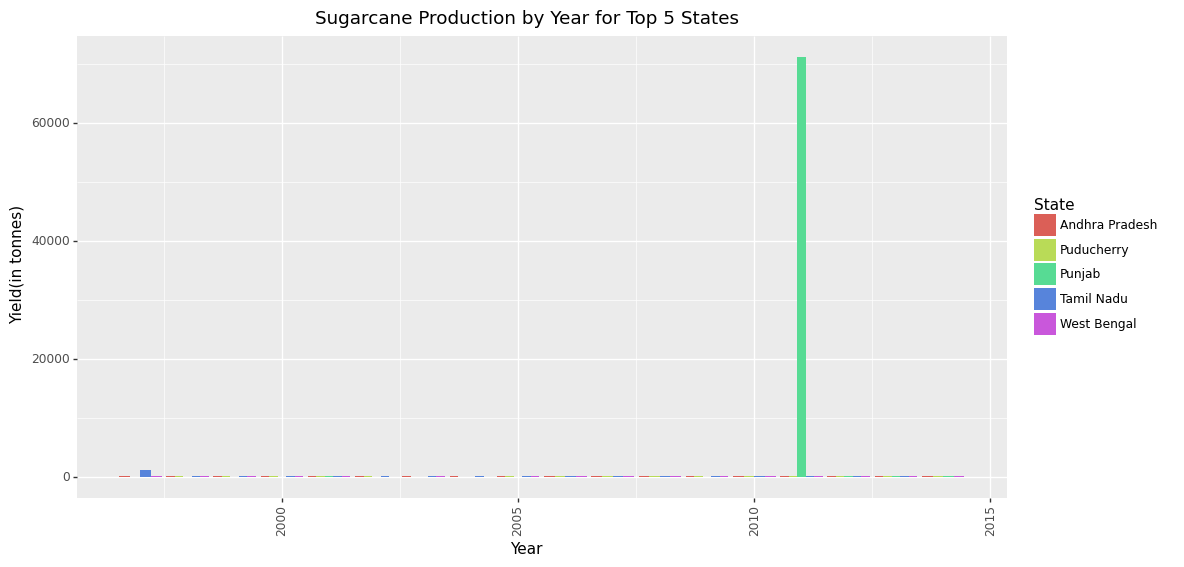

In [ ]:
# Groupby 'Crop_Year' and 'State_Name' and sum 'Production' to get the total production for each year and state
year_state_Sugarcane_production = df_Sugarcane.groupby(['Crop_Year', 'State_Name'])['Yield'].mean().reset_index()
# Sort the states by total production in descending order
state_Sugarcane_production = year_state_Sugarcane_production.groupby('State_Name').sum().reset_index()
state_Sugarcane_production = state_Sugarcane_production.sort_values('Yield', ascending=False)

# Select the top 5 states with highest production
top_5_states_Sugarcane = state_Sugarcane_production.head(5)

# Create a bar chart using ggplot
p = ggplot(year_state_Sugarcane_production[year_state_Sugarcane_production['State_Name'].isin(top_5_states_Sugarcane['State_Name'])],
           aes(x='Crop_Year', y='Yield', fill='State_Name')) + \
    geom_bar(stat='identity', position='dodge') + \
    labs(title='Sugarcane Production by Year for Top 5 States', x='Year', y='Yield(in tonnes)', fill='State') + \
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(12, 6))

# Display the bar chart
print(p)


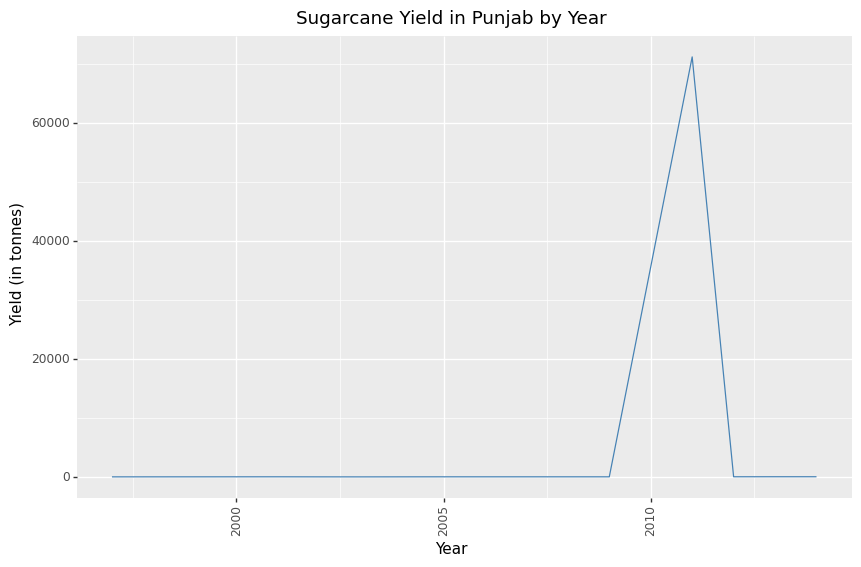

In [ ]:
# Filter the data for Sugarcane crop in Tamil Nadu
df_Sugarcane_Punjab = df_Sugarcane[df_Sugarcane['State_Name'] == 'Punjab']

# Groupby 'Crop_Year' and calculate the mean of 'Yield' to get the average yield for each year
Sugarcane_yield_Punjab = df_Sugarcane_Punjab.groupby('Crop_Year')['Yield'].mean().reset_index()

# Create a line chart using ggplot
p = ggplot(Sugarcane_yield_Punjab, aes(x='Crop_Year', y='Yield')) + \
    geom_line(color='steelblue') + \
    labs(title='Sugarcane Yield in Punjab by Year', x='Year', y='Yield (in tonnes)') + \
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(10, 6))

# Display the line chart
print(p)

From previous graphs it is evident that Punjab district adds more to the anamoly and the particular year which is 2011 has abrupt change in yield comapred to other years.

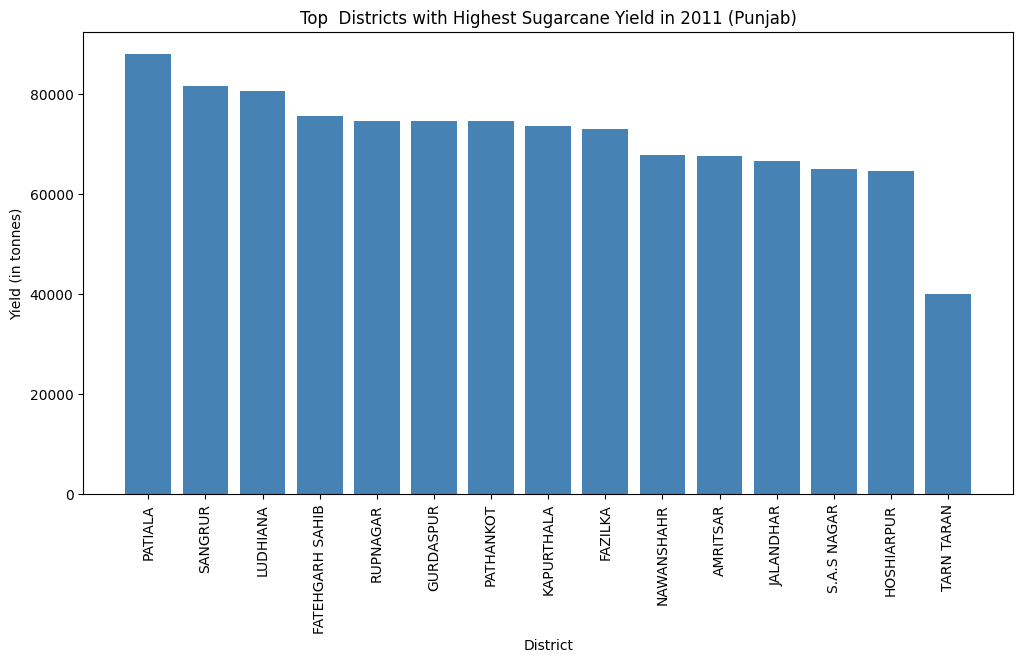

In [ ]:

# Filter the data for Sugarcane crop in the years 2011  in Punjab
df_sugarcane_punjab = df_crop[(df_crop['Crop'] == 'Sugarcane') & (df_crop['Crop_Year'].isin([2011])) & (df_crop['State_Name'] == 'Punjab')]

# Groupby 'District_Name' and calculate the mean of 'Yield' to get the average yield for each district in 2011
sugarcane_yield_punjab = df_sugarcane_punjab.groupby('District_Name')['Yield'].mean().reset_index()

# Sort the districts by yield in descending order
top_20_districts_sugarcane_punjab = sugarcane_yield_punjab.sort_values('Yield', ascending=False).head(20)

# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(top_20_districts_sugarcane_punjab['District_Name'], top_20_districts_sugarcane_punjab['Yield'], color='steelblue')
plt.title('Top  Districts with Highest Sugarcane Yield in 2011 (Punjab)')
plt.xlabel('District')
plt.ylabel('Yield (in tonnes)')
plt.xticks(rotation=90, ha='center')
plt.show()


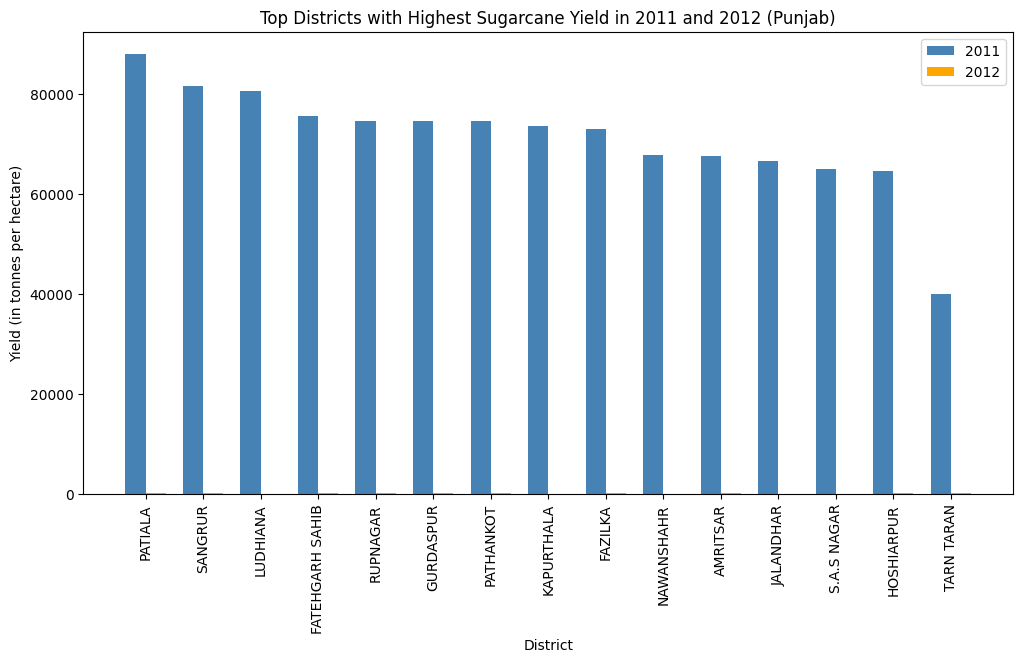

In [ ]:
# Filter the data for Sugarcane crop in the years 2011 and 2012 in Punjab
df_sugarcane_punjab_2011 = df_crop[(df_crop['Crop'] == 'Sugarcane') & (df_crop['Crop_Year'] == 2011) & (df_crop['State_Name'] == 'Punjab')]
df_sugarcane_punjab_2012 = df_crop[(df_crop['Crop'] == 'Sugarcane') & (df_crop['Crop_Year'] == 2012) & (df_crop['State_Name'] == 'Punjab')]

# Groupby 'District_Name' and calculate the mean of 'Yield' to get the average yield for each district in 2011 and 2012
sugarcane_yield_punjab_2011 = df_sugarcane_punjab_2011.groupby('District_Name')['Yield'].mean().reset_index()
sugarcane_yield_punjab_2012 = df_sugarcane_punjab_2012.groupby('District_Name')['Yield'].mean().reset_index()

# Merge the data for 2011 and 2012 by 'District_Name'
merged_df = pd.merge(sugarcane_yield_punjab_2011, sugarcane_yield_punjab_2012, on='District_Name', suffixes=('_2011', '_2012'))

# Sort the districts by yield in descending order
top_20_districts_merged = merged_df.sort_values('Yield_2011', ascending=False).head(20)

# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(top_20_districts_merged))
plt.bar(index, top_20_districts_merged['Yield_2011'], width=bar_width, color='steelblue', label='2011')
plt.bar(index + bar_width, top_20_districts_merged['Yield_2012'], width=bar_width, color='orange', label='2012')
plt.title('Top Districts with Highest Sugarcane Yield in 2011 and 2012 (Punjab)')
plt.xlabel('District')
plt.ylabel('Yield (in tonnes per hectare)')
plt.xticks(index + bar_width/2, top_20_districts_merged['District_Name'], rotation=90, ha='center')
plt.legend()
plt.show()


This plot shows 2011 vs 2012 sugarcane production in the districts of punjab, This particular year their area of cultivation is wrongly provided in the data. This is to illustrate the wrong data from data visualization.

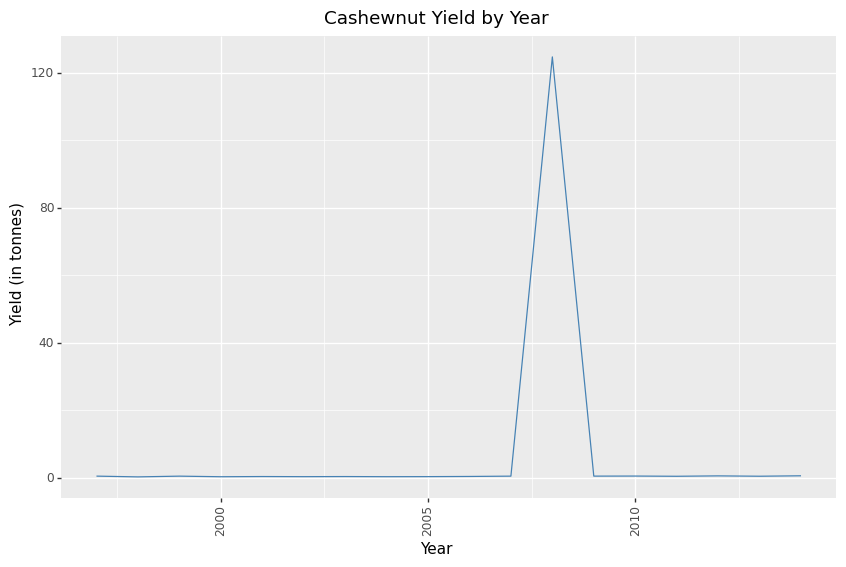

<ggplot: (8768897739665)>

In [ ]:

# Filter the data for Cashewnut crop
df_cashewnut = df_crop[df_crop['Crop'] == 'Cashewnut'].copy()
df_cashewnut['Yield'] = df_cashewnut['Production'] / df_cashewnut['Area']
# Groupby 'Crop_Year' and calculate the mean of 'Yield' to get the average yield for each year
cashewnut_yield = df_cashewnut.groupby('Crop_Year')['Yield'].mean().reset_index()

# Create the line chart using ggplot
(ggplot(cashewnut_yield, aes(x='Crop_Year', y='Yield')) +
    geom_line(color='steelblue') +
    labs(title='Cashewnut Yield by Year', x='Year', y='Yield (in tonnes)') +
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(10, 6))
)


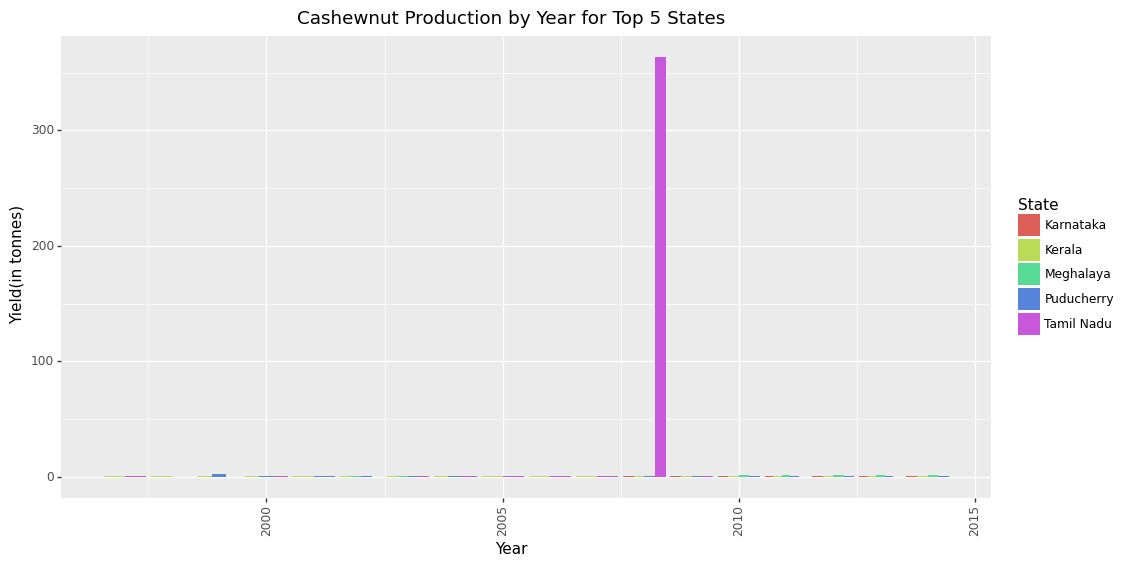

In [ ]:
# Groupby 'Crop_Year' and 'State_Name' and sum 'Production' to get the total production for each year and state
year_state_cashewnut_production = df_cashewnut.groupby(['Crop_Year', 'State_Name'])['Yield'].mean().reset_index()

# Sort the states by total production in descending order
state_cashewnut_production = year_state_cashewnut_production.groupby('State_Name').sum().reset_index()
state_cashewnut_production = state_cashewnut_production.sort_values('Yield', ascending=False)

# Select the top 5 states with highest production
top_5_states_cashewnut = state_cashewnut_production.head(5)

# Create a bar chart using ggplot
p = ggplot(year_state_cashewnut_production[year_state_cashewnut_production['State_Name'].isin(top_5_states_cashewnut['State_Name'])],
           aes(x='Crop_Year', y='Yield', fill='State_Name')) + \
    geom_bar(stat='identity', position='dodge') + \
    labs(title='Cashewnut Production by Year for Top 5 States', x='Year', y='Yield(in tonnes)', fill='State') + \
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(12, 6))

# Display the bar chart
print(p)


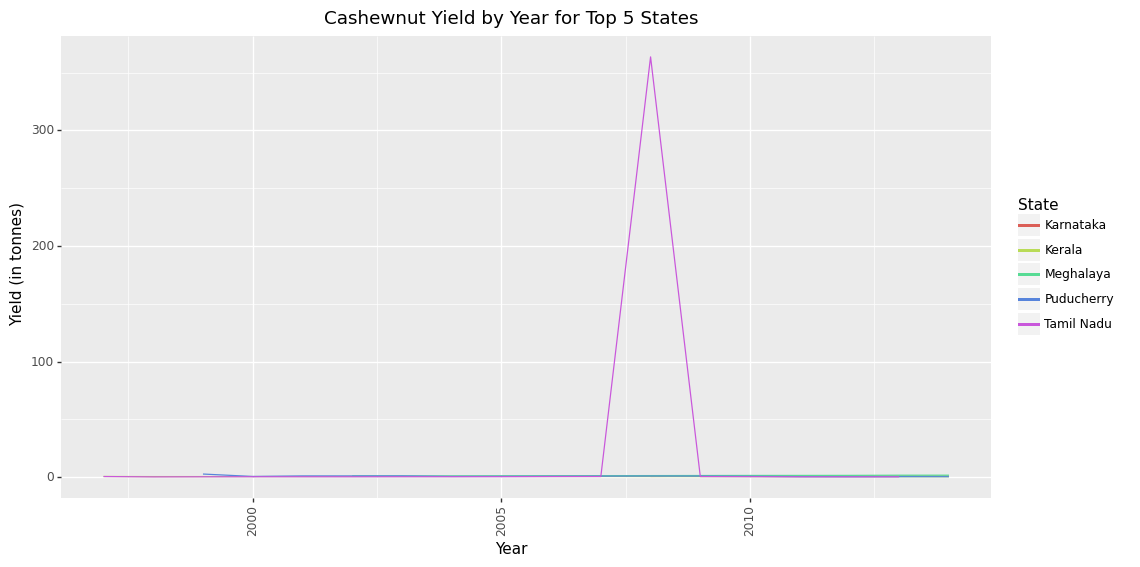

In [ ]:
# Groupby 'Crop_Year' and 'State_Name' and calculate the mean of 'Yield' to get the average yield for each year and state
year_state_cashewnut_yield = df_cashewnut.groupby(['Crop_Year', 'State_Name'])['Yield'].mean().reset_index()

# Sort the states by total yield in descending order
state_cashewnut_yield = year_state_cashewnut_yield.groupby('State_Name').sum().reset_index()
state_cashewnut_yield = state_cashewnut_yield.sort_values('Yield', ascending=False)

# Select the top 5 states with highest yield
top_5_states_cashewnut = state_cashewnut_yield.head(5)

# Create a line chart using ggplot
p = ggplot(year_state_cashewnut_yield[year_state_cashewnut_yield['State_Name'].isin(top_5_states_cashewnut['State_Name'])],
           aes(x='Crop_Year', y='Yield', color='State_Name')) + \
    geom_line() + \
    labs(title='Cashewnut Yield by Year for Top 5 States', x='Year', y='Yield (in tonnes)', color='State') + \
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(12, 6))

# Display the line chart
print(p)

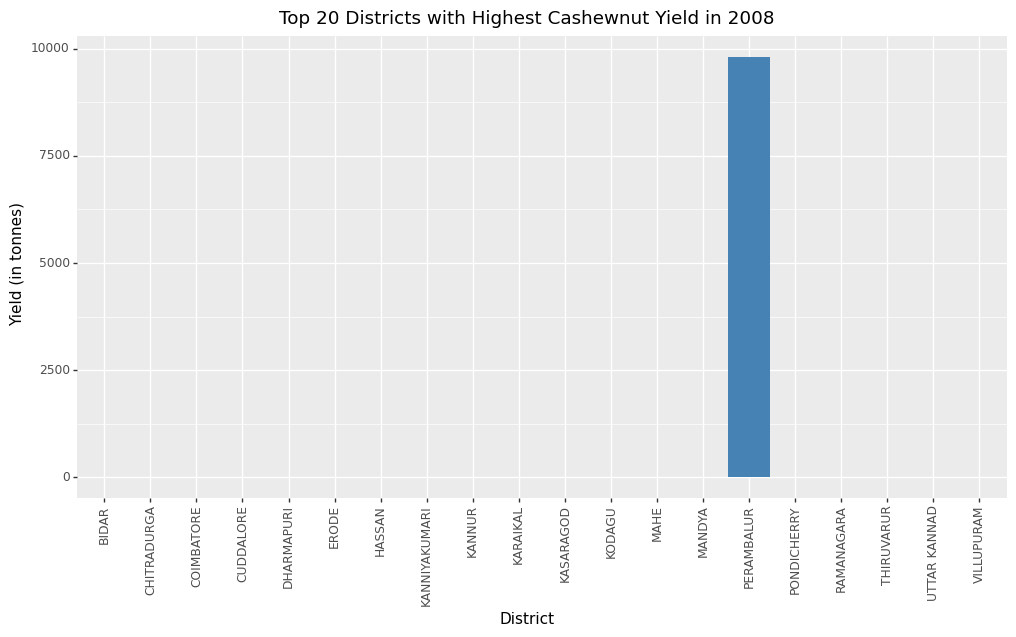

In [ ]:
# Filter the data for Cashewnut crop in the year 2008
df_cashewnut_2008 = df_cashewnut[df_cashewnut['Crop_Year'] == 2008]

# Groupby 'District_Name' and calculate the mean of 'Yield' to get the average yield for each district in 2008
cashewnut_yield_2008 = df_cashewnut_2008.groupby('District_Name')['Yield'].mean().reset_index()

# Sort the districts by yield in descending order
top_20_districts_cashewnut_2008 = cashewnut_yield_2008.sort_values('Yield', ascending=False).head(20)

# Create a bar chart using ggplot
p = ggplot(top_20_districts_cashewnut_2008, aes(x='District_Name', y='Yield')) + \
    geom_bar(stat='identity', fill='steelblue') + \
    labs(title='Top 20 Districts with Highest Cashewnut Yield in 2008', x='District', y='Yield (in tonnes)') + \
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),
          figure_size=(12, 6))

# Display the bar chart
print(p)


Similar analysis is done in case of other data outlier which is cashew and in Perambalur district of Tamil Nadu, a single outlier point has been found in contrast to many districts from sugar cane anamoly.

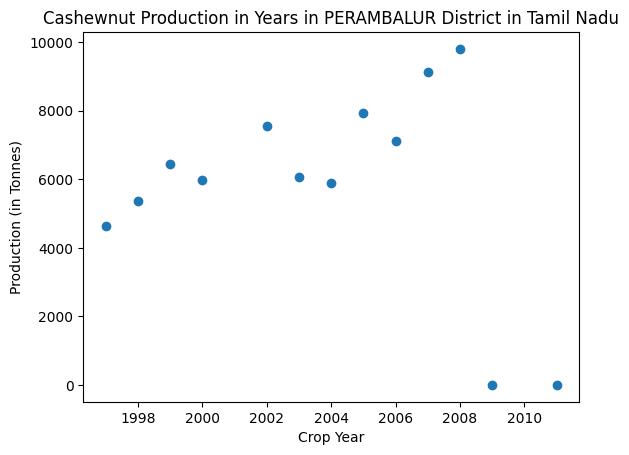

In [ ]:

# Specify the district name and crop name
district_name = 'PERAMBALUR'
crop_name = 'Cashewnut'

# Filter the DataFrame to include only the relevant columns and rows for the given district and crop
df_cashewnut_perambalur = df_crop[(df_crop['District_Name'] == district_name) &
                                  (df_crop['Crop'] == crop_name)]

# Create a scatter plot of 'Area' vs 'Production'
plt.scatter(df_cashewnut_perambalur['Crop_Year'], df_cashewnut_perambalur['Production'])
plt.xlabel('Crop Year')
plt.ylabel('Production (in Tonnes)')
plt.title(f'{crop_name} Production in Years in {district_name} District in Tamil Nadu')
plt.show()


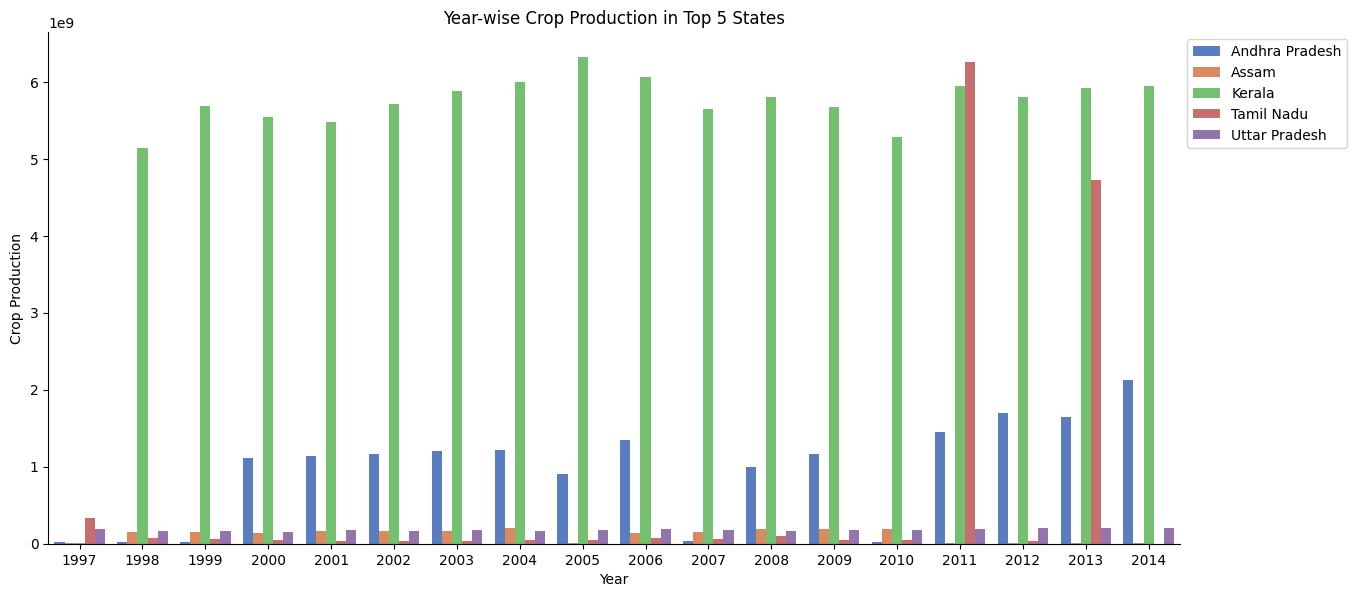

In [ ]:
# Filter data to select top 5 states by total crop production
top5_states = df_crop.groupby('State_Name').agg({'Production': 'sum'}).reset_index()
top5_states = top5_states.nlargest(5, 'Production')['State_Name'].tolist()

# Filter data to include only the top 10 states
crop_data_top5_states = df_crop[df_crop['State_Name'].isin(top5_states)]

# Calculate year-wise crop production for the top 5 states
yearwise_crop_production = crop_data_top5_states.groupby(['State_Name', 'Crop_Year']).agg({'Production': 'sum'}).reset_index()

# Plot year-wise crop production for the top 5 states with facetting based on state
g = sns.catplot(x='Crop_Year', y='Production', hue='State_Name', data=yearwise_crop_production, kind='bar', height=6, aspect=2, palette='muted', legend_out=False)
g.set_xlabels('Year')
g.set_ylabels('Crop Production')
g.set(title='Year-wise Crop Production in Top 5 States')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

The above plot shows year-wise top 5 production States that have high production.

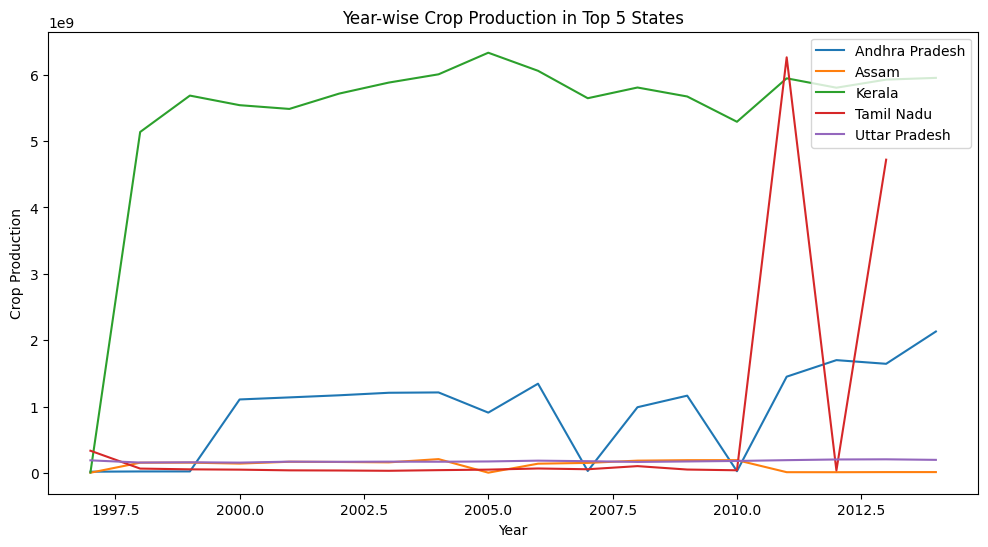

In [ ]:
# Filter data to select top 5 states by total crop production
top5_states = df_crop.groupby('State_Name').agg({'Production': 'sum'}).reset_index()
top5_states = top5_states.nlargest(5, 'Production')['State_Name'].tolist()

# Filter data to include only the top 5 states
crop_data_top5_states = df_crop[df_crop['State_Name'].isin(top5_states)]

# Calculate year-wise crop production for the top 5 states
yearwise_crop_production = crop_data_top5_states.groupby(['State_Name', 'Crop_Year']).agg({'Production': 'sum'}).reset_index()

# Pivot the data to create a wide-format dataframe with State_Name as columns
wide_df = yearwise_crop_production.pivot(index='Crop_Year', columns='State_Name', values='Production')

# Plot year-wise crop production for the top 5 states with lines for each state
plt.figure(figsize=(12,6))
for state in wide_df.columns:
    plt.plot(wide_df.index, wide_df[state], label=state)
plt.xlabel('Year')
plt.ylabel('Crop Production')
plt.title('Year-wise Crop Production in Top 5 States')
plt.legend(loc='upper right',bbox_to_anchor=(1,1))
plt.show()


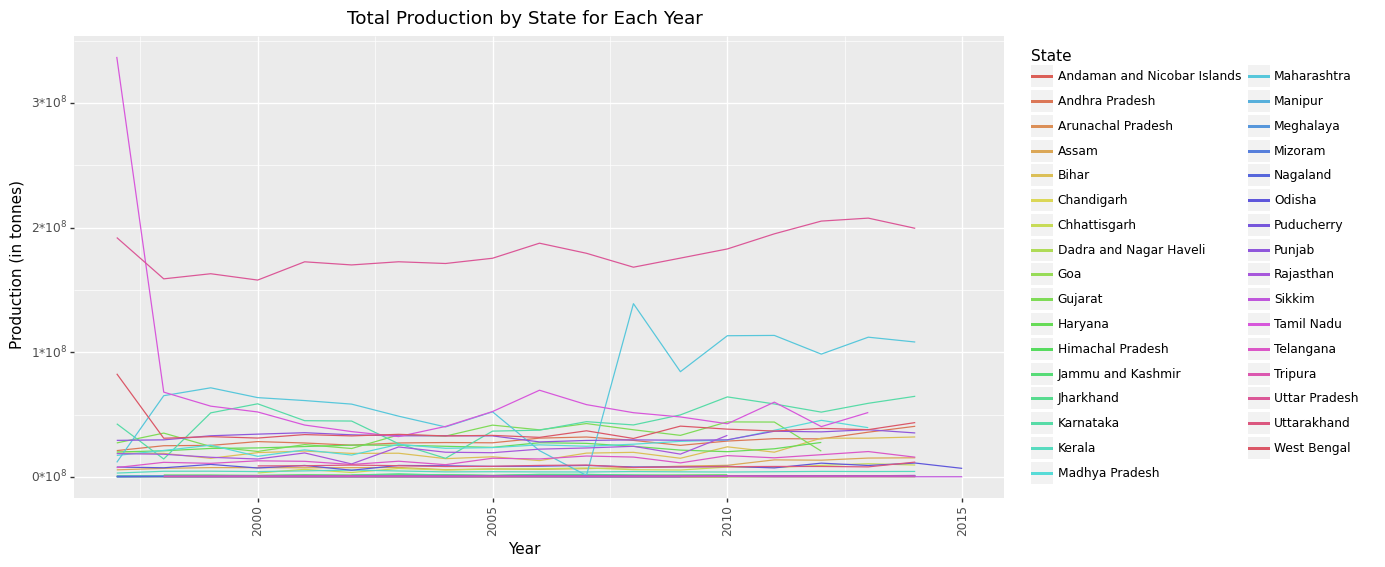

In [ ]:
df_crop_no_coconut = df_crop[df_crop['Crop'] != 'Coconut ']
# Groupby 'Crop_Year' and 'State_Name' and sum 'Production' to get the total production for each year and state
year_state_production = df_crop_no_coconut.groupby(['Crop_Year', 'State_Name'])['Production'].sum().reset_index()

# Create a line chart using ggplot
p = ggplot(year_state_production, aes(x='Crop_Year', y='Production', color='State_Name')) + \
    geom_line() + \
    labs(title='Total Production by State for Each Year', x='Year', y='Production (in tonnes)', color='State') + \
    theme(axis_text_x=element_text(rotation=90, hjust=0.5), figure_size=(12, 6))+\
    scale_y_continuous(labels=lambda l: ["{}*$10^8$".format(int(x / 1e8)) for x in l])

# Display the line chart
print(p)


The above graph Shows crop production trend in each state.

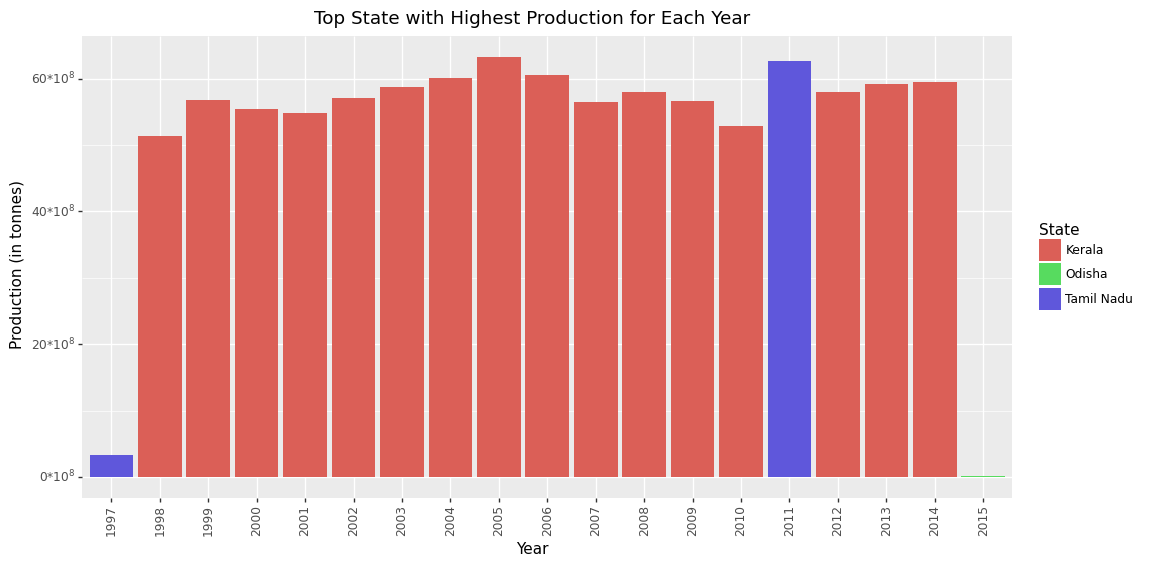

In [ ]:

# Groupby 'Crop_Year' and 'State_Name' and sum 'Production' to get the total production for each year and state
year_top_state_production = df_crop.groupby(['Crop_Year', 'State_Name'])['Production'].sum().reset_index()

# Get the top state with highest total production for each year
top_state_by_year = year_top_state_production.groupby('Crop_Year').apply(lambda x: x[x['Production'] == x['Production'].max()]).reset_index(drop=True)

# Create a bar chart using ggplot
p = ggplot(top_state_by_year, aes(x='factor(Crop_Year)', y='Production', fill='State_Name')) + \
    geom_bar(stat='identity', position='dodge') + \
    labs(title='Top State with Highest Production for Each Year', x='Year', y='Production (in tonnes)', fill='State') + \
    theme(axis_text_x=element_text(rotation=90, hjust=0.5), figure_size=(12, 6))+\
    scale_y_continuous(labels=lambda l: ["{}*$10^8$".format(int(x / 1e8)) for x in l])

# Display the bar chart
print(p)

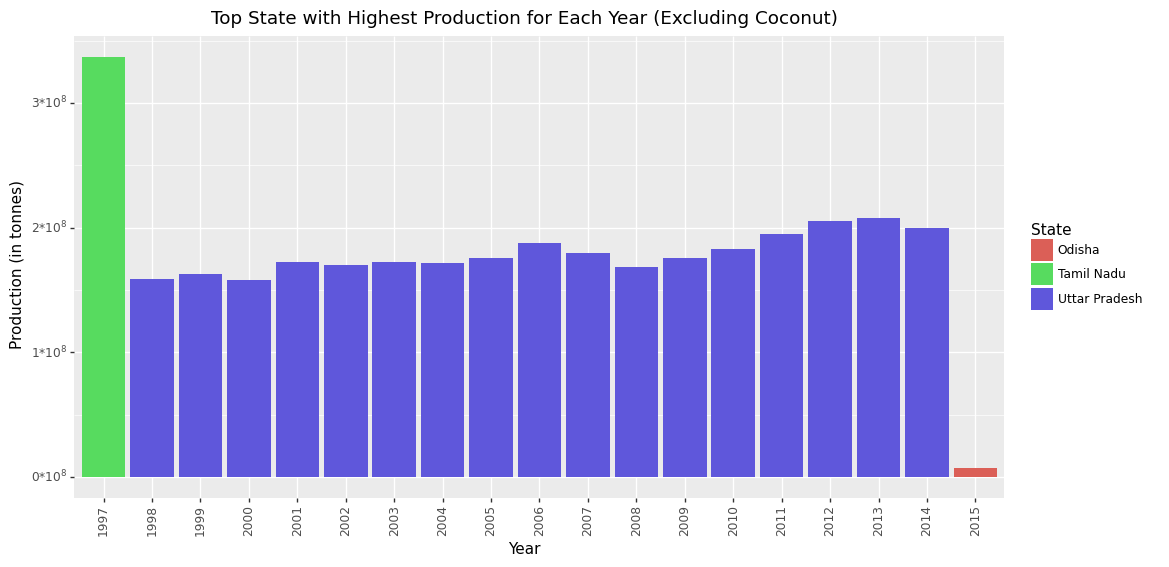

In [ ]:

# Filter out 'Coconut' from the data
df_crop_no_coconut = df_crop[df_crop['Crop'] != 'Coconut ']

# Groupby 'Crop_Year' and 'State_Name' and sum 'Production' to get the total production for each year and state
year_top_state_production = df_crop_no_coconut.groupby(['Crop_Year', 'State_Name'])['Production'].sum().reset_index()

# Get the top state with highest total production for each year
top_state_by_year = year_top_state_production.groupby('Crop_Year').apply(lambda x: x[x['Production'] == x['Production'].max()]).reset_index(drop=True)

# Create a bar chart using ggplot
p = ggplot(top_state_by_year, aes(x='factor(Crop_Year)', y='Production', fill='State_Name')) + \
    geom_bar(stat='identity', position='dodge') + \
    labs(title='Top State with Highest Production for Each Year (Excluding Coconut)', x='Year', y='Production (in tonnes)', fill='State') + \
    theme(axis_text_x=element_text(rotation=90, hjust=0.5), figure_size=(12, 6)) + \
    scale_y_continuous(labels=lambda l: ["{}*$10^8$".format(int(x / 1e8)) for x in l])

# Display the bar chart
print(p)


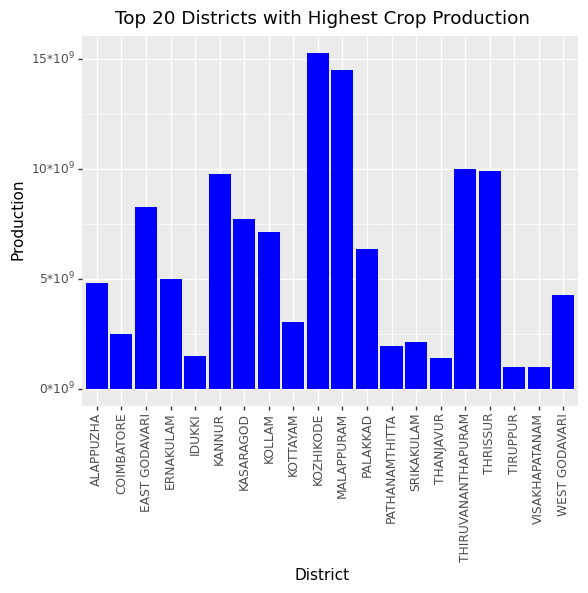

In [ ]:
# Group by district and calculate total production
district_production = df_crop.groupby('District_Name')['Production'].sum()

# Sort by production in descending order
district_production = district_production.sort_values(ascending=False)

# Select top 20 districts
top_20_districts = district_production.head(20)

# Create a DataFrame from the top 20 districts
top_20_districts_df = pd.DataFrame({'District': top_20_districts.index, 'Production': top_20_districts.values})

# Plot the top 20 districts with highest production using ggplot
plot = (ggplot(top_20_districts_df, aes(x='District', y='Production')) +
        geom_bar(stat='identity', fill='blue') +
        labs(title='Top 20 Districts with Highest Crop Production', x='District', y='Production') +
        theme(axis_text_x=element_text(rotation=90, hjust=0.5)) +scale_y_continuous(labels=lambda l: ["{}*$10^9$".format(int(x / 1e9)) for x in l])
       )
print(plot)




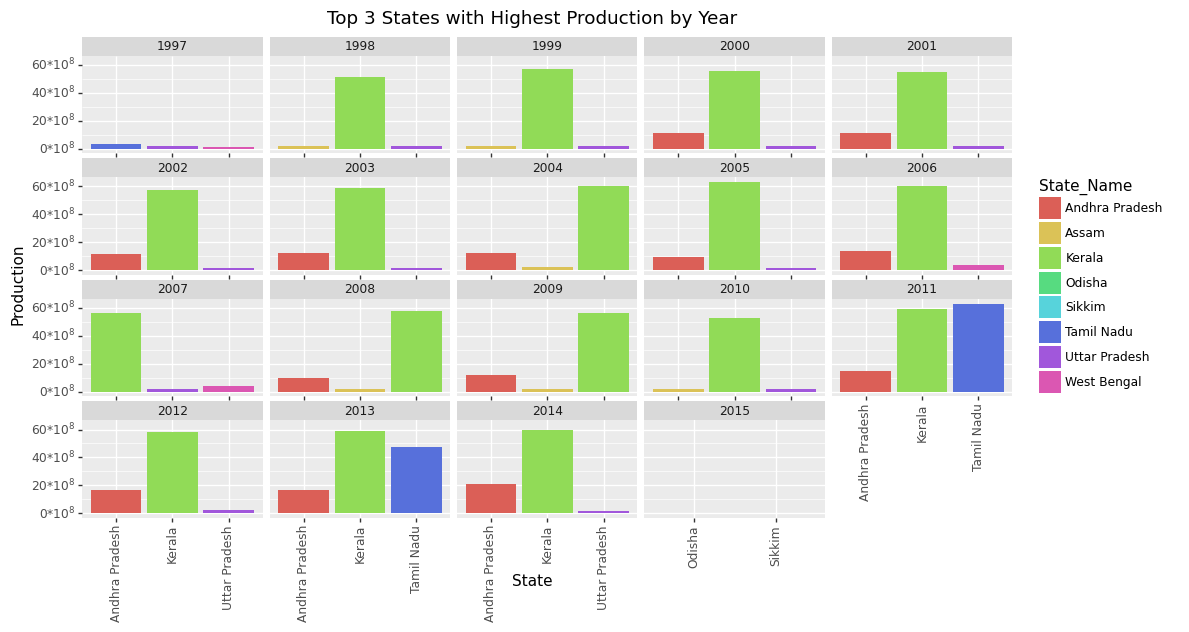

In [ ]:

# Groupby 'Crop_Year', 'State_Name' and calculate the sum of 'Production'
production_by_year_state = df_crop.groupby(['Crop_Year', 'State_Name'])['Production'].sum().reset_index()

# Sort the data by 'Crop_Year' and 'Production' in descending order
production_by_year_state_sorted = production_by_year_state.sort_values(['Crop_Year', 'Production'], ascending=[True, False])

# Groupby 'Crop_Year' and get the top 3 states with highest production for each year
top_3_states_by_year = production_by_year_state_sorted.groupby('Crop_Year').head(3)

# Create a bar chart using ggplot with facetting on 'Crop_Year'
p = ggplot(top_3_states_by_year, aes(x='State_Name', y='Production', fill='State_Name')) + \
    geom_bar(stat='identity') + \
    facet_wrap('~ Crop_Year',scales='free_x', ncol=5) + \
    labs(title='Top 3 States with Highest Production by Year', x='State', y='Production') + \
    theme(axis_text_x=element_text(rotation=90, hjust=0.5),subplots_adjust={'hspace': 0.25},
          figure_size=(12, 6))+scale_y_continuous(labels=lambda l: ["{}*$10^8$".format(int(x / 1e8)) for x in l])

# Display the bar chart
print(p)

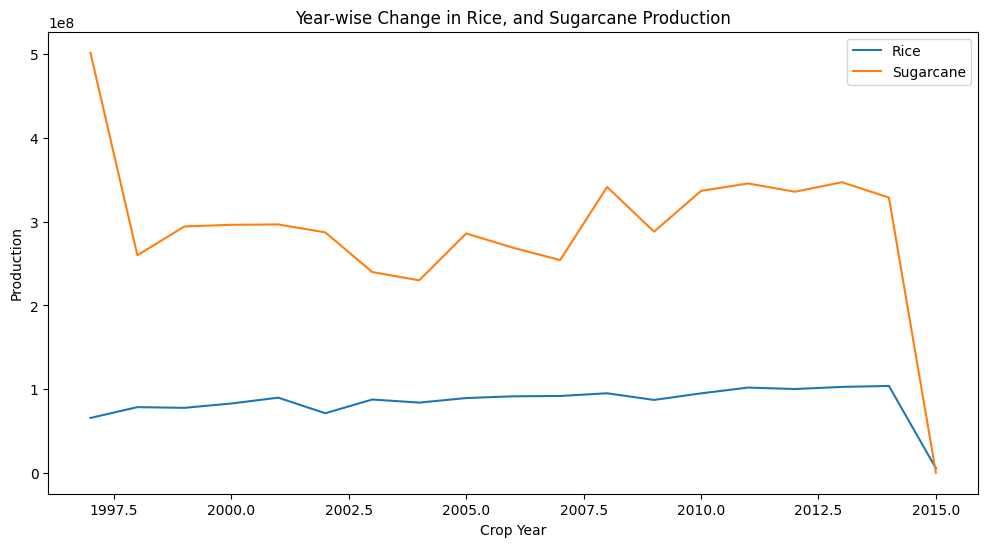

In [ ]:
# Filter the data for Coconut, Rice, and Sugarcane crops
df_coconut = df_crop[df_crop['Crop'] == 'Coconut ']
#print(df_coconut.head())
df_rice = df_crop[df_crop['Crop'] == 'Rice']
df_sugarcane = df_crop[df_crop['Crop'] == 'Sugarcane']

# Groupby 'Crop_Year' and calculate the sum of 'Production' for each year
production_by_year_coconut = df_coconut.groupby('Crop_Year')['Production'].sum().reset_index()
production_by_year_rice = df_rice.groupby('Crop_Year')['Production'].sum().reset_index()
production_by_year_sugarcane = df_sugarcane.groupby('Crop_Year')['Production'].sum().reset_index()

# Create line plots for year-wise change in Coconut, Rice, and Sugarcane crops
plt.figure(figsize=(12, 6))
#sns.lineplot(data=production_by_year_coconut, x='Crop_Year', y='Production', label='Coconut')
sns.lineplot(data=production_by_year_rice, x='Crop_Year', y='Production', label='Rice')
sns.lineplot(data=production_by_year_sugarcane, x='Crop_Year', y='Production', label='Sugarcane')
plt.title('Year-wise Change in Rice, and Sugarcane Production')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.legend()
plt.show()

# Get the top state with highest production for each crop in each year
top_state_by_year_coconut = df_coconut.groupby(['Crop_Year', 'State_Name'])['Production'].sum().reset_index().sort_values(['Crop_Year', 'Production'], ascending=[True, False]).groupby('Crop_Year').head(1)
top_state_by_year_rice = df_rice.groupby(['Crop_Year', 'State_Name'])['Production'].sum().reset_index().sort_values(['Crop_Year', 'Production'], ascending=[True, False]).groupby('Crop_Year').head(1)
top_state_by_year_sugarcane = df_sugarcane.groupby(['Crop_Year', 'State_Name'])['Production'].sum().reset_index().sort_values(['Crop_Year', 'Production'], ascending=[True, False]).groupby('Crop_Year').head(1)



The above graph shows trend in Sugarcane and Rice crop production over the years.

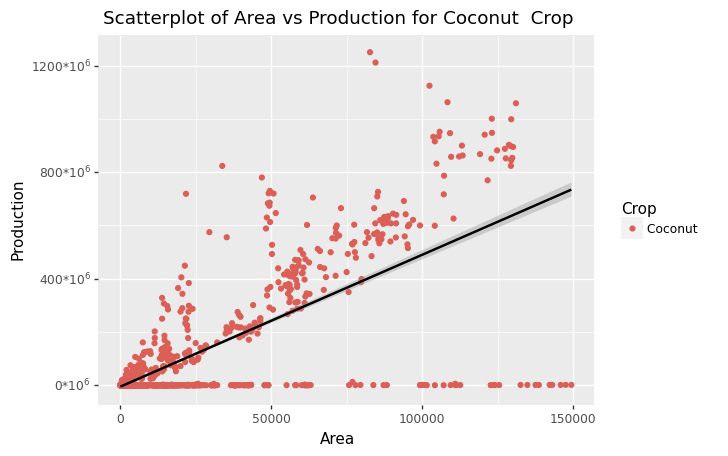

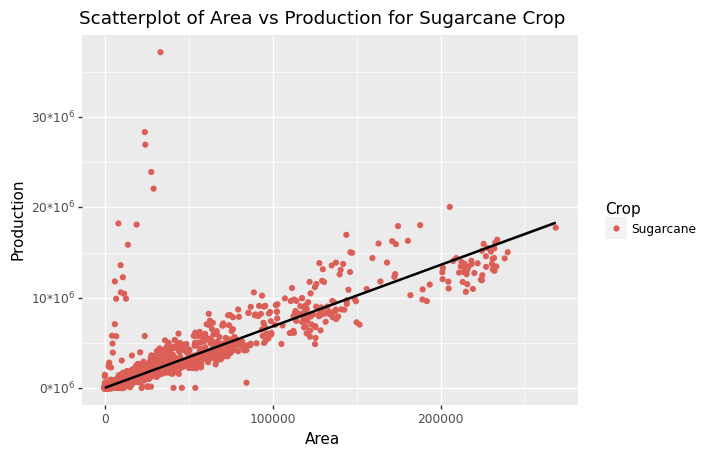

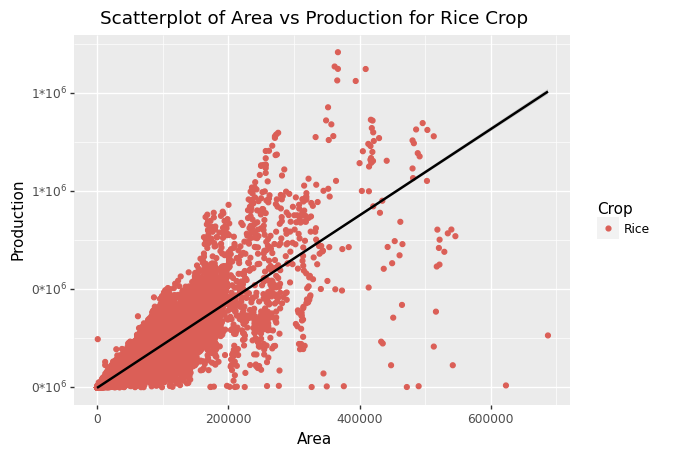

In [ ]:

# Filter the long-format dataframe for Coconut, Sugarcane, and Rice crops
crops = ['Coconut ', 'Sugarcane', 'Rice']
df_crops = df_crop[df_crop['Crop'].isin(crops)]

# Loop through each crop and create scatterplot with fitted line
for crop in crops:
    plot = (ggplot(df_crops[df_crops['Crop'] == crop], aes(x='Area', y='Production', color='Crop')) +
            geom_point() +
            geom_smooth(method='lm', color='black') +
            ggtitle(f'Scatterplot of Area vs Production for {crop} Crop') +
            xlab('Area') +
            ylab('Production') +
            scale_color_discrete(name='Crop'))+scale_y_continuous(labels=lambda l: ["{}*$10^6$".format(int(x / 1e6)) for x in l])
    print(plot)

In [ ]:

df=pd.read_csv("Fish_Production.csv")
for st in df.columns:
  print("Missing values for",st,"  ",df[st].isna().sum())
total_cols = df.filter(regex='^Total', axis=1).columns
df = df.drop(total_cols, axis=1)
try:
  df = df.melt(id_vars='States or Union Territories', var_name='Year_Type', value_name='Production')
except:
  print("This line has already been run")
# Extract year and type information from 'Year_Type' column
df['Year'] = df['Year_Type'].str.split(' - ').str[1]
df['Type'] = df['Year_Type'].str.split(' - ').str[0]
df = df[~df['Year'].str.contains('Total')]
# Drop unnecessary columns
df.drop('Year_Type', axis=1, inplace=True)
# Rename column
df.rename(columns={'States or Union Territories': 'State Name'}, inplace=True)

# Handle missing values in 'Production' column
df['Production'].fillna(0, inplace=True)

# Print resulting dataframe
print(len(df))
df = df[~df['State Name'].str.contains('Total')]
df = df[~df['Type'].str.contains('Total')]

Missing values for States or Union Territories    0
Missing values for Marine - 2007-08    22
Missing values for Inland - 2007-08    0
Missing values for Total - 2007-08    0
Missing values for Marine - 2008-09    22
Missing values for Inland - 2008-09    0
Missing values for Total - 2008-09    0
Missing values for Marine - 2009-10    22
Missing values for Inland - 2009-10    0
Missing values for Total - 2009-10    0
Missing values for Marine - 2010-11    22
Missing values for Inland - 2010-11    0
Missing values for Total - 2010-11    0
Missing values for Marine - 2011-12    22
Missing values for Inland - 2011-12    0
Missing values for Total - 2011-12    0
Missing values for Marine - 2012-13    21
Missing values for Inland - 2012-13    0
Missing values for Total - 2012-13    0
432


In [ ]:
df = df[~df['State Name'].str.contains('Total')]
df = df[~df['Type'].str.contains('Total')]

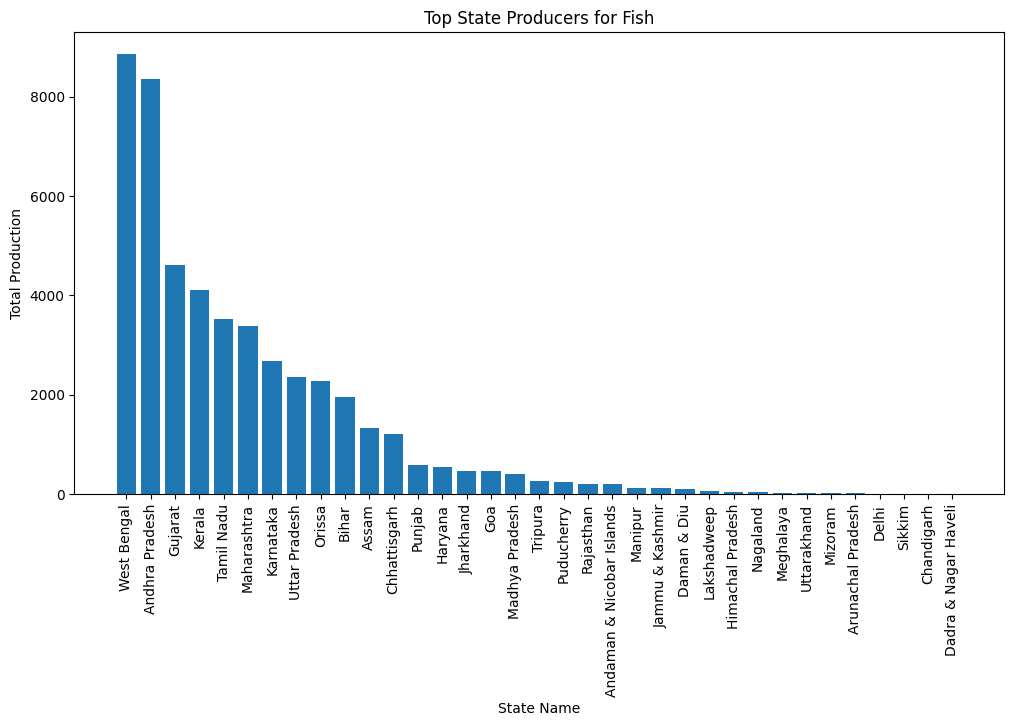

In [ ]:
# Group data by 'State Name' and calculate total production
top_producers = df.groupby('State Name')['Production'].sum().reset_index()

# Sort by total production in descending order
top_producers = top_producers.sort_values('Production', ascending=False)

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_producers['State Name'], top_producers['Production'])
plt.xlabel('State Name')
plt.ylabel('Total Production')
plt.title('Top State Producers for Fish')
plt.xticks(rotation=90)
plt.show()

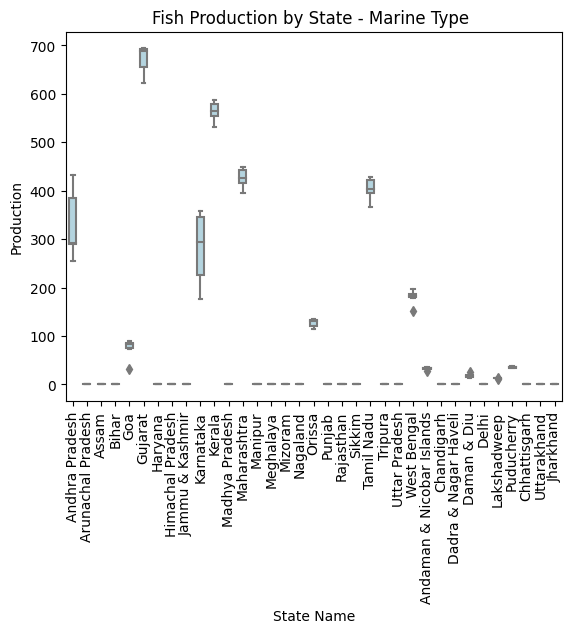

In [ ]:

# Filter the data for 'Marine' type
df_marine = df[df['Type'] == 'Marine']

# Create a boxplot
sns.boxplot(x='State Name', y='Production', data=df_marine, color='lightblue', width=0.5)
plt.title('Fish Production by State - Marine Type ')
plt.xlabel('State Name')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()


The boxplot shows the range of Production values that each state has with respect to fish prodution for Marine type.


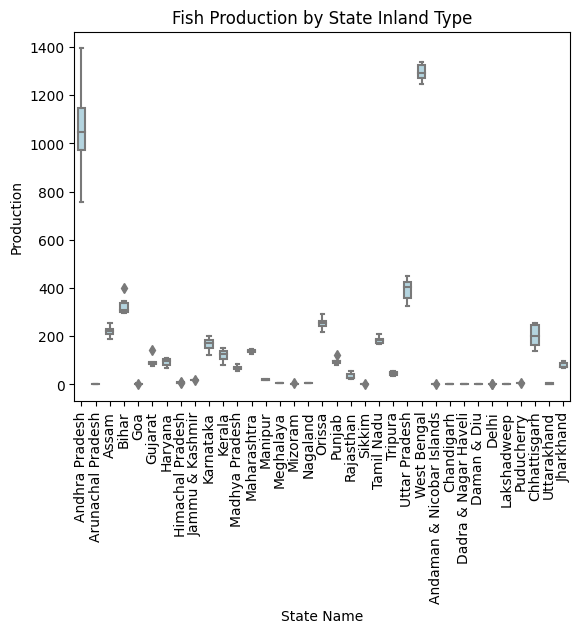

In [ ]:
# Filter the data for 'Marine' type
df_marine = df[df['Type'] == 'Inland']

# Create a boxplot
sns.boxplot(x='State Name', y='Production', data=df_marine, color='lightblue', width=0.5)
plt.title('Fish Production by State Inland Type')
plt.xlabel('State Name')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()


The boxplot shows the range of Production values that each state has with respect to fish prodution for Inland type.

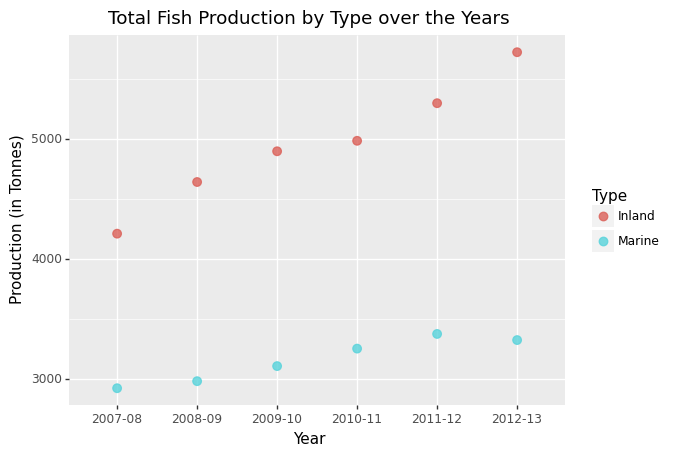

In [ ]:
# Group the data by 'Year' and 'Type' and sum the 'Production' column
df_type = df.groupby(['Year', 'Type'])['Production'].sum().reset_index()

# Create a scatterplot for total 'Marine' and 'Inland' fish production over the years
p = ggplot(data=df_type) + \
    aes(x='Year', y='Production', color='Type') + \
    geom_point(size=3, alpha=0.8) + \
    scale_x_discrete(name='Year') + \
    scale_y_continuous(name='Production (in Tonnes)') + \
    labs(title='Total Fish Production by Type over the Years')

# Show the plot
print(p)

In [ ]:
# Create dataframe
dfh=pd.read_csv("Horticulture.csv")
dfh = dfh.drop(columns=[col for col in dfh.columns if 'Total' in col])
dfh = dfh[~dfh['State/ UT Name'].str.contains('Total')]
# Initialize empty lists to store rows
rows = []
dfh.drop('Category',axis=1,inplace=True)
# Loop through each row in the dataframe
for index, row in dfh.iterrows():
    state = row['State/ UT Name']
    for col in dfh.columns:
        #print(col)
        if col != 'State/ UT Name':
            crop, attribute, year1,year2 = col.split('-')
            if attribute == 'Production':
                production = row[col]
                area = row[crop + '-Area-' + year1+'-'+year2]
                row_data = [state, crop, year1+'-'+year2, area, production]
                rows.append(row_data)

# Create new dataframe with desired columns
df_new = pd.DataFrame(rows, columns=['State/UT Name', 'Crop', 'Year', 'Area', 'Production'])
df_new['Year'] = df_new['Year'].str.replace(' @', '')



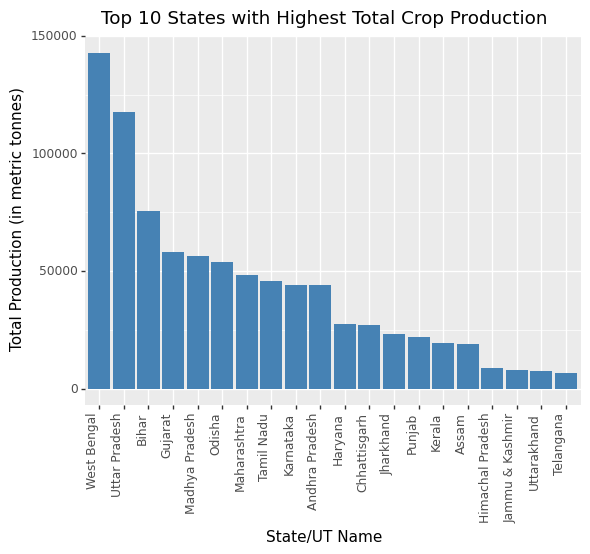

In [ ]:
dfh=df_new.copy()
# group the data by State/UT Name and calculate the total production
state_production = dfh.groupby('State/UT Name')['Production'].sum().sort_values(ascending=False)
# extract the top 20 states with the highest total production
top_states = state_production.nlargest(20)

# filter the dataframe to include only the top 20 states
df_top = dfh[dfh['State/UT Name'].isin(top_states.index)]
df_top = df_top.dropna(subset=['Production'])
# sort the dataframe by production within the top 20 states
df_top_sorted = df_top.sort_values(['State/UT Name', 'Production'], ascending=[True, False])

# create a categorical variable with the ordered state names
state_order = pd.Categorical(df_top_sorted['State/UT Name'], categories=top_states.index, ordered=True)

# add the categorical variable to the dataframe
df_top_sorted['State Order'] = state_order

# create a bar plot using ggplot
plot = ggplot(df_top_sorted, aes(x='State Order', y='Production')) + geom_bar(stat='identity', fill='steelblue') + \
      ggtitle('Top 10 States with Highest Total Crop Production') + xlab('State/UT Name') + ylab('Total Production (in metric tonnes)') + \
      scale_x_discrete(labels=top_states.index) + theme(axis_text_x=element_text(angle=90, hjust=1))
print(plot)


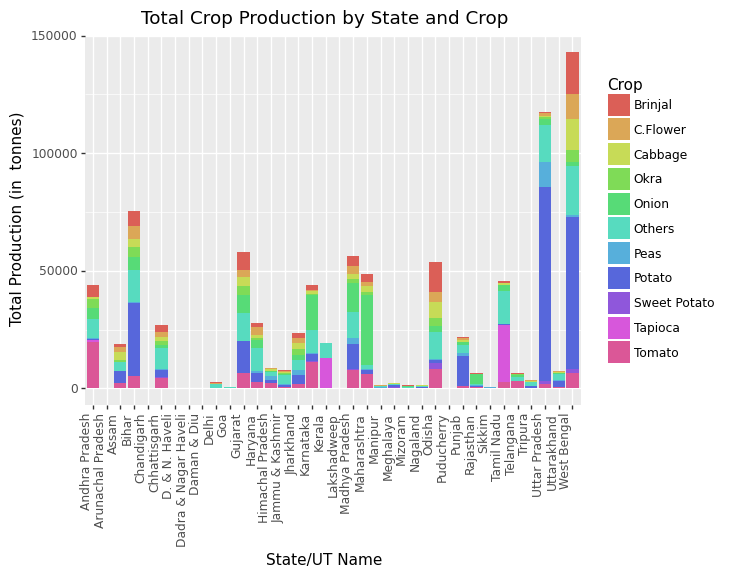

In [ ]:
# group the data by State/UT Name and Crop and calculate the total production
state_crop_production = dfh.groupby(['State/UT Name', 'Crop'])['Production'].sum().reset_index()

# create a stacked bar plot using ggplot
plot = ggplot(state_crop_production, aes(x='State/UT Name', y='Production', fill='Crop')) + geom_bar(stat='identity') + \
 ggtitle('Total Crop Production by State and Crop') + xlab('State/UT Name') + ylab('Total Production (in  tonnes)') + \
 theme(axis_text_x=element_text(angle=90, hjust=1), legend_position='right')
print(plot)


In [ ]:
# Calculate the total area for each state
state_areas = dfh.groupby('State/UT Name')['Area'].sum().reset_index()

# Sort the DataFrame in descending order of areas
state_areas_sorted = state_areas.sort_values('Area', ascending=False)

# Create the bar plot
fig = px.bar(state_areas_sorted, x='State/UT Name', y='Area',
             color='State/UT Name', title='Total Crop Area by State/UT (in Hectares)')
fig.update_layout(xaxis_title='State/UT Name', yaxis_title='Total Crop Area (in Hectares)')
fig.show()

In [ ]:
# Group by year and create scatter plots
fig = px.scatter(dfh, x="Area", y="Production", color="Year",
                 title="Area vs Production for each year",
                 hover_data=["State/UT Name", "Crop"])
fig.show()

This is stacked bar plot for Horticulture data and Brinjal is almost grown in all states and few of the states do not have any production or very very low in terms of production line Arunachal Pradesh, few Union Teritorries. Onion is seen in significant number of states.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning:

geom_point : Removed 803 rows containing missing values.



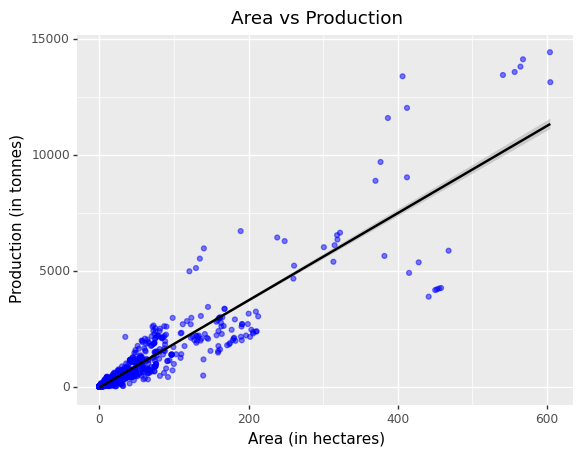

In [ ]:
# create a scatter plot of Area vs Production with a line of best fit
plot = ggplot(dfh, aes(x='Area', y='Production')) + geom_point(alpha=0.5,color='blue') + geom_smooth(method='lm', color='black') +\
 ggtitle('Area vs Production') + xlab('Area (in hectares)') + ylab('Production (in tonnes)')
print(plot)

In [ ]:
dfg=pd.read_csv("GDP_dataset.csv")
#dfg.iloc[:, 1:8] = dfg.iloc[:, 1:8].apply(lambda x: x.str.replace(' ', '').astype(float))
# Remove space and commas from columns 1 to 7
dfg[dfg.columns[1:8]] = dfg[dfg.columns[1:8]].apply(lambda x: x.str.replace(',', '').str.strip())
dfg[dfg.columns[1:]] = dfg[dfg.columns[1:]].astype(float)


In [ ]:
dfg.columns

Index(['Financial Year',
       'Gross Domestic Product (in Rs. Cr) at 2004-05 Prices',
       'Agriculture & Allied Services (in Rs. Cr.) at 2004-05 Prices',
       'Agriculture (in Rs. Cr.) at 2004-05 Prices',
       'Industry (in Rs. Cr.) at 2004-05 Prices',
       'Mining and Quarrying (in Rs. Cr.) at 2004-05 Prices',
       'Manufacturing (in Rs. Cr.) at 2004-05 Prices',
       'Services (in Rs. Cr.) at 2004-05 Prices',
       'Agri-culture & Allied Services -Share to Total GDP',
       'Agriculture - Share to Total GDP', 'Industry - Share to Total GDP',
       'Mining and Quarrying - Share to Total GDP',
       'Manufacturing - Share to Total GDP', 'Services - Share to Total GDP',
       'Gross Domestic Product - % Growth Rate (YoY)',
       'Agri-culture & Allied Services - % Growth Rate (YoY)',
       'Agriculture - % Growth Rate (YoY)', 'Industry - % Growth Rate (YoY)',
       'Mining and Quarrying - % Growth Rate (YoY)',
       'Manufacturing - % Growth Rate (YoY)',
       'S

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning:

geom_point : Removed 47 rows containing missing values.

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning:

geom_path: Removed 46 rows containing missing values.



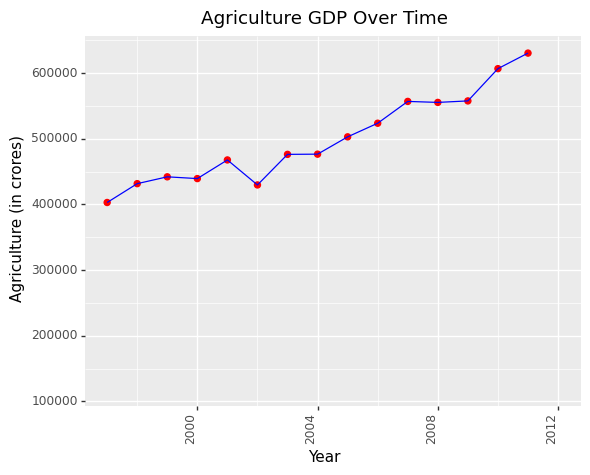

<ggplot: (8768897350245)>

In [ ]:
dfg['Year'] = dfg['Financial Year'].str[:4].astype(int)
dfg['Year'] = dfg[(dfg['Year'] > 1996) & (dfg['Year'] <= 2012)]['Year']
# Filter data to include only Agriculture column and Gross Domestic Product
df_agri = dfg[['Year', 'Agriculture (in Rs. Cr.) at 2004-05 Prices']]

# Rename columns for ggplot compatibility
df_agri = df_agri.rename(columns={'Financial Year': 'Year', 'Agriculture (in Rs. Cr.) at 2004-05 Prices': 'Agriculture'})

# Create line plot for Agriculture over time
ggplot(df_agri, aes(x='Year', y='Agriculture')) + geom_point(color='red', size=2) + \
    geom_line(color='blue') + theme(axis_text_x=element_text(angle=90, hjust=1))+ \
    labs(title='Agriculture GDP Over Time', x='Year', y='Agriculture (in crores)')


In [ ]:
dfg = dfg.dropna(subset=['Year'])
dfg['Year'].unique()

array([1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012.])

This shows the increase in agriculture price contribution to GDP and it increses over time as the advancements in technolog helped farning during these years.

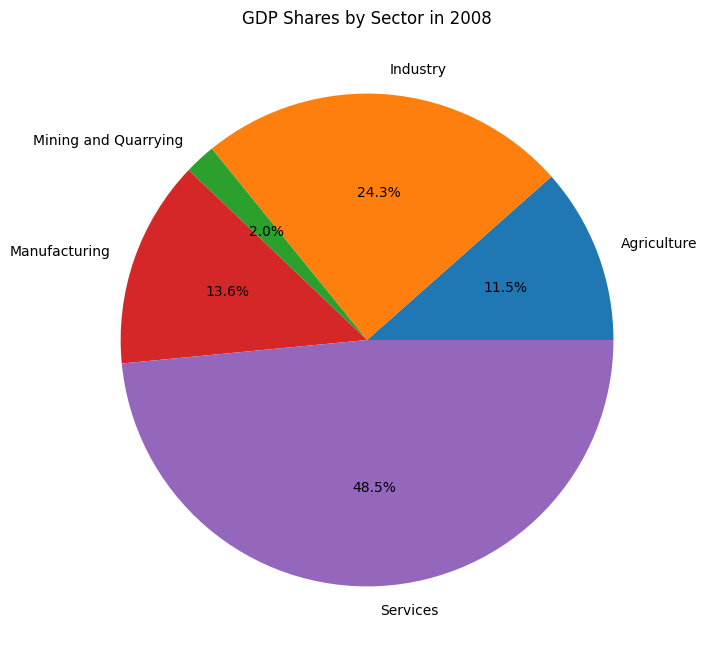

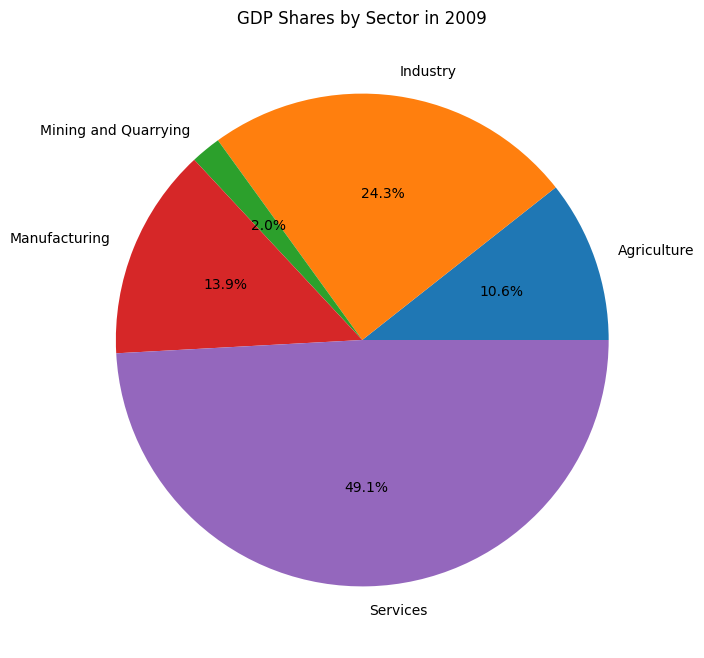

In [ ]:
# Filter the data for the year 2008
dfg_2008 = dfg[dfg['Financial Year'] == '2008-09']

# Extract the values for the required columns
values = dfg_2008[['Agriculture - Share to Total GDP', 'Industry - Share to Total GDP',
                   'Mining and Quarrying - Share to Total GDP', 'Manufacturing - Share to Total GDP',
                   'Services - Share to Total GDP']].values.tolist()[0]

# Create a list of labels for the pie chart
labels = ['Agriculture', 'Industry', 'Mining and Quarrying', 'Manufacturing', 'Services']

# Set the size of the figure
plt.figure(figsize=(8,8))

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the chart
plt.title('GDP Shares by Sector in 2008')

# Show the chart
plt.show()

# Filter the data for the year 2008
dfg_2009 = dfg[dfg['Financial Year'] == '2009-10']

# Extract the values for the required columns
values = dfg_2009[['Agriculture - Share to Total GDP', 'Industry - Share to Total GDP',
                   'Mining and Quarrying - Share to Total GDP', 'Manufacturing - Share to Total GDP',
                   'Services - Share to Total GDP']].values.tolist()[0]

# Create a list of labels for the pie chart
labels = ['Agriculture', 'Industry', 'Mining and Quarrying', 'Manufacturing', 'Services']

# Set the size of the figure
plt.figure(figsize=(8,8))

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the chart
plt.title('GDP Shares by Sector in 2009')

# Show the chart
plt.show()



The above pie charts shows the contribution of agriculture during the years 2008 and 2009. In 2008-09, Agriculure contributed around 11.5% to the GDP and 10.6 in 2009-10 financail years.

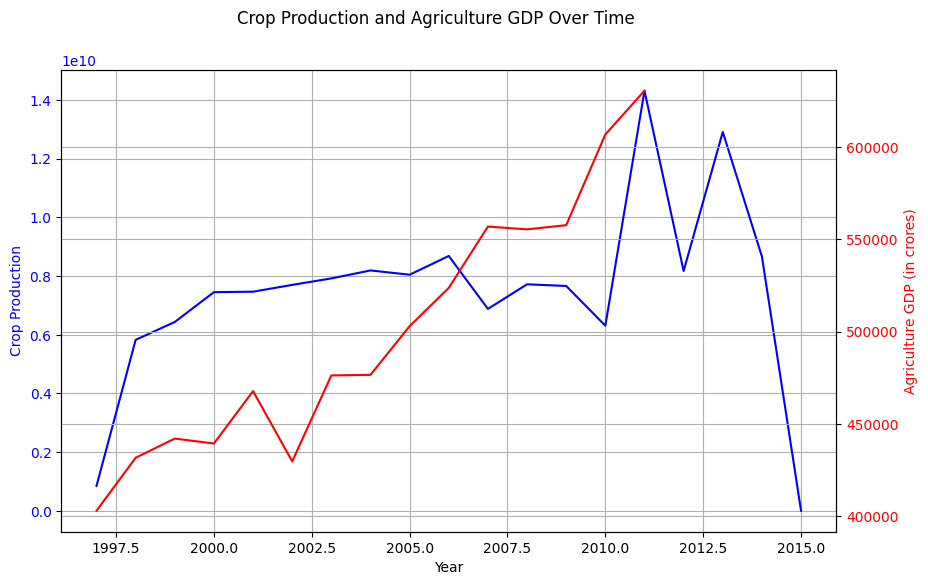

In [ ]:

# Group by Crop_Year and calculate total production
crop_year_production = df_crop.groupby('Crop_Year')['Production'].sum().reset_index()

# Filter data to include only Agriculture column and Gross Domestic Product
df_agri = dfg[['Year', 'Agriculture (in Rs. Cr.) at 2004-05 Prices']]
df_agri = df_agri[(df_agri['Year'] > 1996) & (df_agri['Year'] <= 2012)]
# Rename columns for compatibility
df_agri = df_agri.rename(columns={'Agriculture (in Rs. Cr.) at 2004-05 Prices': 'Agriculture GDP'})

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the crop production data
ax1.plot(crop_year_production['Crop_Year'], crop_year_production['Production'], color='blue')
#ax1.set_title('Crop Production and Agriculture GDP Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Crop Production',color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Add a second y-axis for agriculture GDP data
ax2 = ax1.twinx()
ax2.plot(df_agri['Year'], df_agri['Agriculture GDP'], color='red')
ax2.set_ylabel('Agriculture GDP (in crores)',color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Add gridlines to both axes
ax1.grid(True)
ax2.grid(True)
fig.suptitle('Crop Production and Agriculture GDP Over Time')
# Display the plot
plt.show()


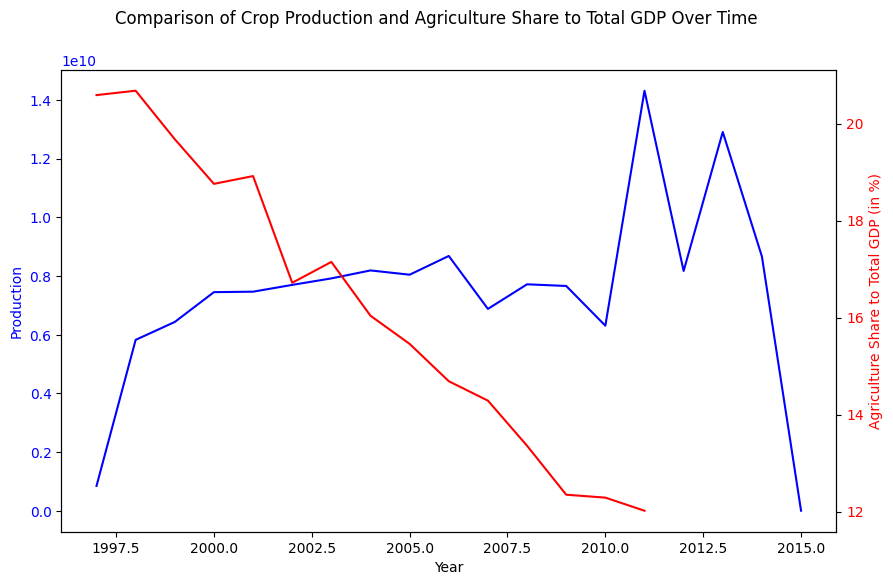

In [ ]:
# Group by Crop_Year and calculate total production
crop_year_production = df_crop.groupby('Crop_Year')['Production'].sum().reset_index()

# Filter data to include only Agriculture column and Agriculture - Share to Total GDP
df_agri = dfg[['Year', 'Agriculture - Share to Total GDP']]
df_agri = df_agri[(df_agri['Year'] > 1996) & (df_agri['Year'] <= 2012)]
# Rename columns for compatibility
df_agri = df_agri.rename(columns={'Agriculture - Share to Total GDP': 'Agriculture Share GDP'})

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the crop production data
ax1.plot(crop_year_production['Crop_Year'], crop_year_production['Production'], color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Production', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second axis for agriculture GDP data
ax2 = ax1.twinx()

# Plot the agriculture GDP data
ax2.plot(df_agri['Year'], df_agri['Agriculture Share GDP'], color='red')
ax2.set_ylabel('Agriculture Share to Total GDP (in %)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a shared title for the figure
fig.suptitle('Comparison of Crop Production and Agriculture Share to Total GDP Over Time')

# Display the plot
plt.show()


The above two plots shows trends in agriculture GDP contribution in rupees and contribution in percentage to the total GDP.

It is clearly evident that even though there is increase in amount of money contributed towards GDP, the percentage contibution is significantly decreasing. This shows that the incrase in Production doesn't mean more increase in it's share other industries seems more profitable compared to other sectors.

No wonder why people leaving villages for daily labour and business in cities as agriculture doesn't show much profits. Hope Agriculture gets it's fame back with new advancements and attract next generations.